In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# RFM Segmentation

About the dataset:
Detailed data on sales of consumer goods obtained by ‘scanning’ the bar codes for individual products at electronic points of sale in a retail store. The data provide detailed information about quantities, characteristics and values of goods sold as well as their prices.

The anonymized dataset includes 64.682 transactions of 5.242 SKU's sold to 22.625 customers during one year.

Dataset description:

* Date of Sales Transaction
* Customer ID
* Transaction ID
* SKU Category ID (“stock keeping unit,” and, as the name suggests, it is a number that retailers assign to products to keep track of stock levels internally.)
* SKU ID
* Quantity Sold
* Sales Amount (Unit price times quantity. For unit price, please divide Sales Amount by Quantity.)


In [ ]:
df_raw=pd.read_csv("/content/drive/MyDrive/AI_Marketing/scanner_data.csv")
df_raw

,Unnamed: 0,Date,Customer_ID,Transaction_ID,SKU_Category,SKU,Quantity,Sales_Amount
0,1,02/01/2016,2547,1,X52,0EM7L,1.0,3.13
1,2,02/01/2016,822,2,2ML,68BRQ,1.0,5.46
2,3,02/01/2016,3686,3,0H2,CZUZX,1.0,6.35
3,4,02/01/2016,3719,4,0H2,549KK,1.0,5.59
4,5,02/01/2016,9200,5,0H2,K8EHH,1.0,6.88
...,...,...,...,...,...,...,...,...
131701,131702,04/07/2016,20203,32900,IEV,FO112,3.0,6.46
131702,131703,04/07/2016,20203,32900,N8U,I36F2,1.0,4.50
131703,131704,04/07/2016,20203,32900,U5F,4X8P4,1.0,5.19
131704,131705,04/07/2016,20203,32900,0H2,ZVTO4,1.0,4.57


In [ ]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131706 entries, 0 to 131705
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Unnamed: 0      131706 non-null  int64  
 1   Date            131706 non-null  object 
 2   Customer_ID     131706 non-null  int64  
 3   Transaction_ID  131706 non-null  int64  
 4   SKU_Category    131706 non-null  object 
 5   SKU             131706 non-null  object 
 6   Quantity        131706 non-null  float64
 7   Sales_Amount    131706 non-null  float64
dtypes: float64(2), int64(3), object(3)
memory usage: 8.0+ MB


Unamed column seems to be just a identifier of the row here i check if my assumption is correct

In [ ]:
df_raw["Unnamed: 0"].nunique()

131706

Dropping unnamed column which is just an unique number to identify each row

In [ ]:
df_clean = df_raw.copy()
df_clean = df_clean.drop(columns=['Unnamed: 0'])
df_clean

,Date,Customer_ID,Transaction_ID,SKU_Category,SKU,Quantity,Sales_Amount
0,02/01/2016,2547,1,X52,0EM7L,1.0,3.13
1,02/01/2016,822,2,2ML,68BRQ,1.0,5.46
2,02/01/2016,3686,3,0H2,CZUZX,1.0,6.35
3,02/01/2016,3719,4,0H2,549KK,1.0,5.59
4,02/01/2016,9200,5,0H2,K8EHH,1.0,6.88
...,...,...,...,...,...,...,...
131701,04/07/2016,20203,32900,IEV,FO112,3.0,6.46
131702,04/07/2016,20203,32900,N8U,I36F2,1.0,4.50
131703,04/07/2016,20203,32900,U5F,4X8P4,1.0,5.19
131704,04/07/2016,20203,32900,0H2,ZVTO4,1.0,4.57


In [ ]:
#Checking for duplicates

df_clean[df_clean.duplicated(keep=False)]

,Date,Customer_ID,Transaction_ID,SKU_Category,SKU,Quantity,Sales_Amount


No duplicates in the dataset

In [ ]:
#Turnign Date column to date time

df_clean['Date'] = pd.to_datetime(df_clean['Date'], format='%d/%m/%Y')
df_clean

,Date,Customer_ID,Transaction_ID,SKU_Category,SKU,Quantity,Sales_Amount
0,2016-01-02,2547,1,X52,0EM7L,1.0,3.13
1,2016-01-02,822,2,2ML,68BRQ,1.0,5.46
2,2016-01-02,3686,3,0H2,CZUZX,1.0,6.35
3,2016-01-02,3719,4,0H2,549KK,1.0,5.59
4,2016-01-02,9200,5,0H2,K8EHH,1.0,6.88
...,...,...,...,...,...,...,...
131701,2016-07-04,20203,32900,IEV,FO112,3.0,6.46
131702,2016-07-04,20203,32900,N8U,I36F2,1.0,4.50
131703,2016-07-04,20203,32900,U5F,4X8P4,1.0,5.19
131704,2016-07-04,20203,32900,0H2,ZVTO4,1.0,4.57


In [ ]:
 df_clean.describe(percentiles=[.01,.1,.25,.5,.75,.90,.95,.99]).T

,count,mean,min,1%,10%,25%,50%,75%,90%,95%,99%,max,std
Date,131706,2016-07-04 18:00:03.608036096,2016-01-02 00:00:00,2016-01-06 00:00:00,2016-02-09 00:00:00,2016-04-05 00:00:00,2016-07-02 00:00:00,2016-10-07 00:00:00,2016-11-29 00:00:00,2016-12-14 00:00:00,2016-12-27 00:00:00,2016-12-31 00:00:00,NaN
Customer_ID,131706.0,12386.450367,1.0,339.0,2990.0,7349.0,13496.0,17306.0,19182.5,20918.0,22136.0,22625.0,6086.447552
Transaction_ID,131706.0,32389.604187,1.0,665.0,6319.5,16134.0,32620.0,48548.0,58270.0,61398.0,63982.0,64682.0,18709.901238
Quantity,131706.0,1.485311,0.01,1.0,1.0,1.0,1.0,1.0,2.0,3.0,4.0,400.0,3.872667
Sales_Amount,131706.0,11.981524,0.02,1.06,2.36,4.23,6.92,12.33,23.73,36.41,94.75,707.73,19.359699


The data seem to be taken from a span of about an year and there seem to be customers that made more than one purchase (based on min and max of customer ID and transation ID).

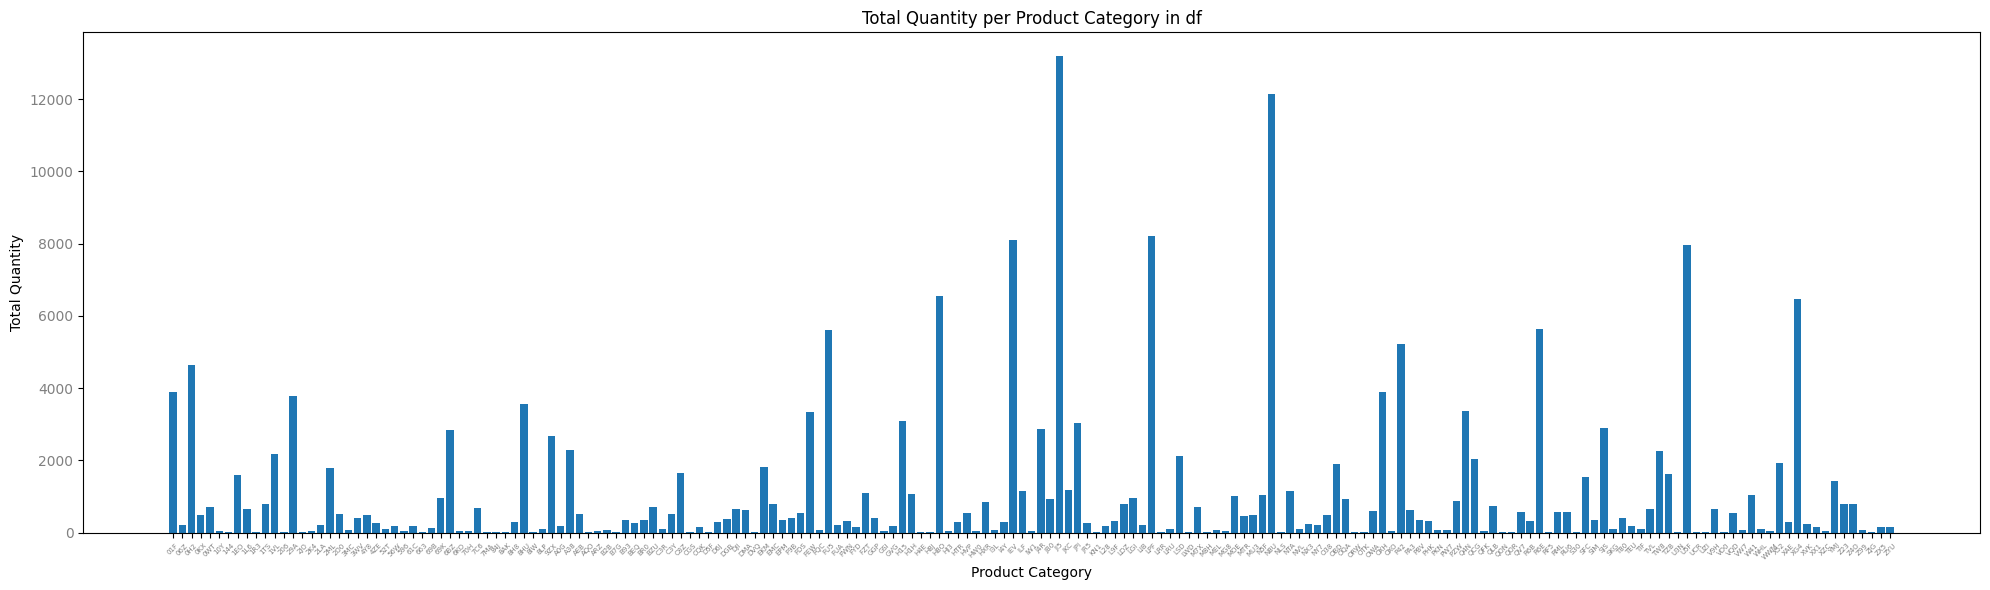

In [ ]:
#Visualisation of the product category present in the dataseer
product_quantity = df_clean.groupby('SKU_Category')['Quantity'].sum()
plt.figure(figsize=(20, 6))

bars = plt.bar(product_quantity.index, product_quantity.values)
plt.xlabel("Product Category")
plt.ylabel("Total Quantity")
plt.title("Total Quantity per Product Category in df")
plt.xticks(rotation=45, color='gray', size=5)
plt.yticks(color='gray')
plt.tight_layout()

plt.show()

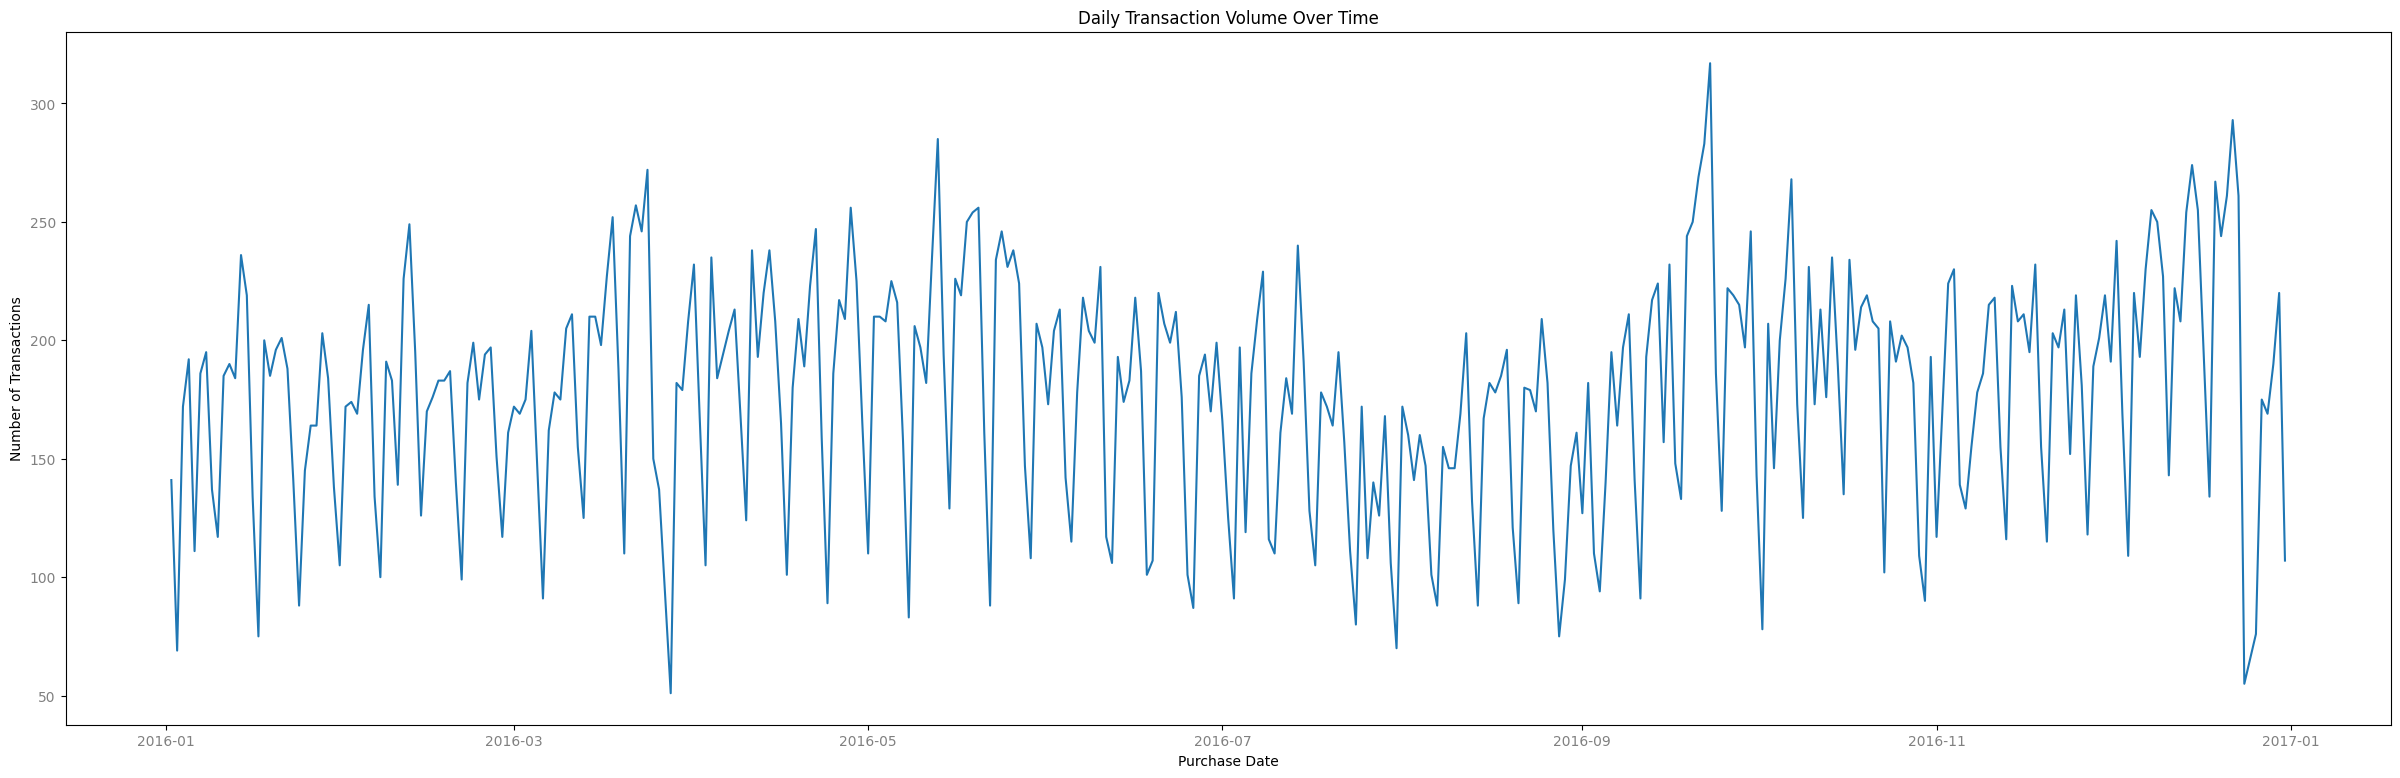

In [ ]:
#Visualization of the number of transaction based on different dates

df_copy = df_clean.copy()
df_copy = df_copy.groupby('Date').agg(TransactionNo=('Transaction_ID', 'nunique')).reset_index()
plt.figure(figsize=(30, 9))
sns.lineplot(data=df_copy, x='Date', y='TransactionNo')
plt.xlabel("Purchase Date")
plt.ylabel("Number of Transactions")
plt.title('Daily Transaction Volume Over Time')
plt.style.use('fivethirtyeight')
plt.xticks(color='gray')
plt.yticks(color='gray')
plt.show()


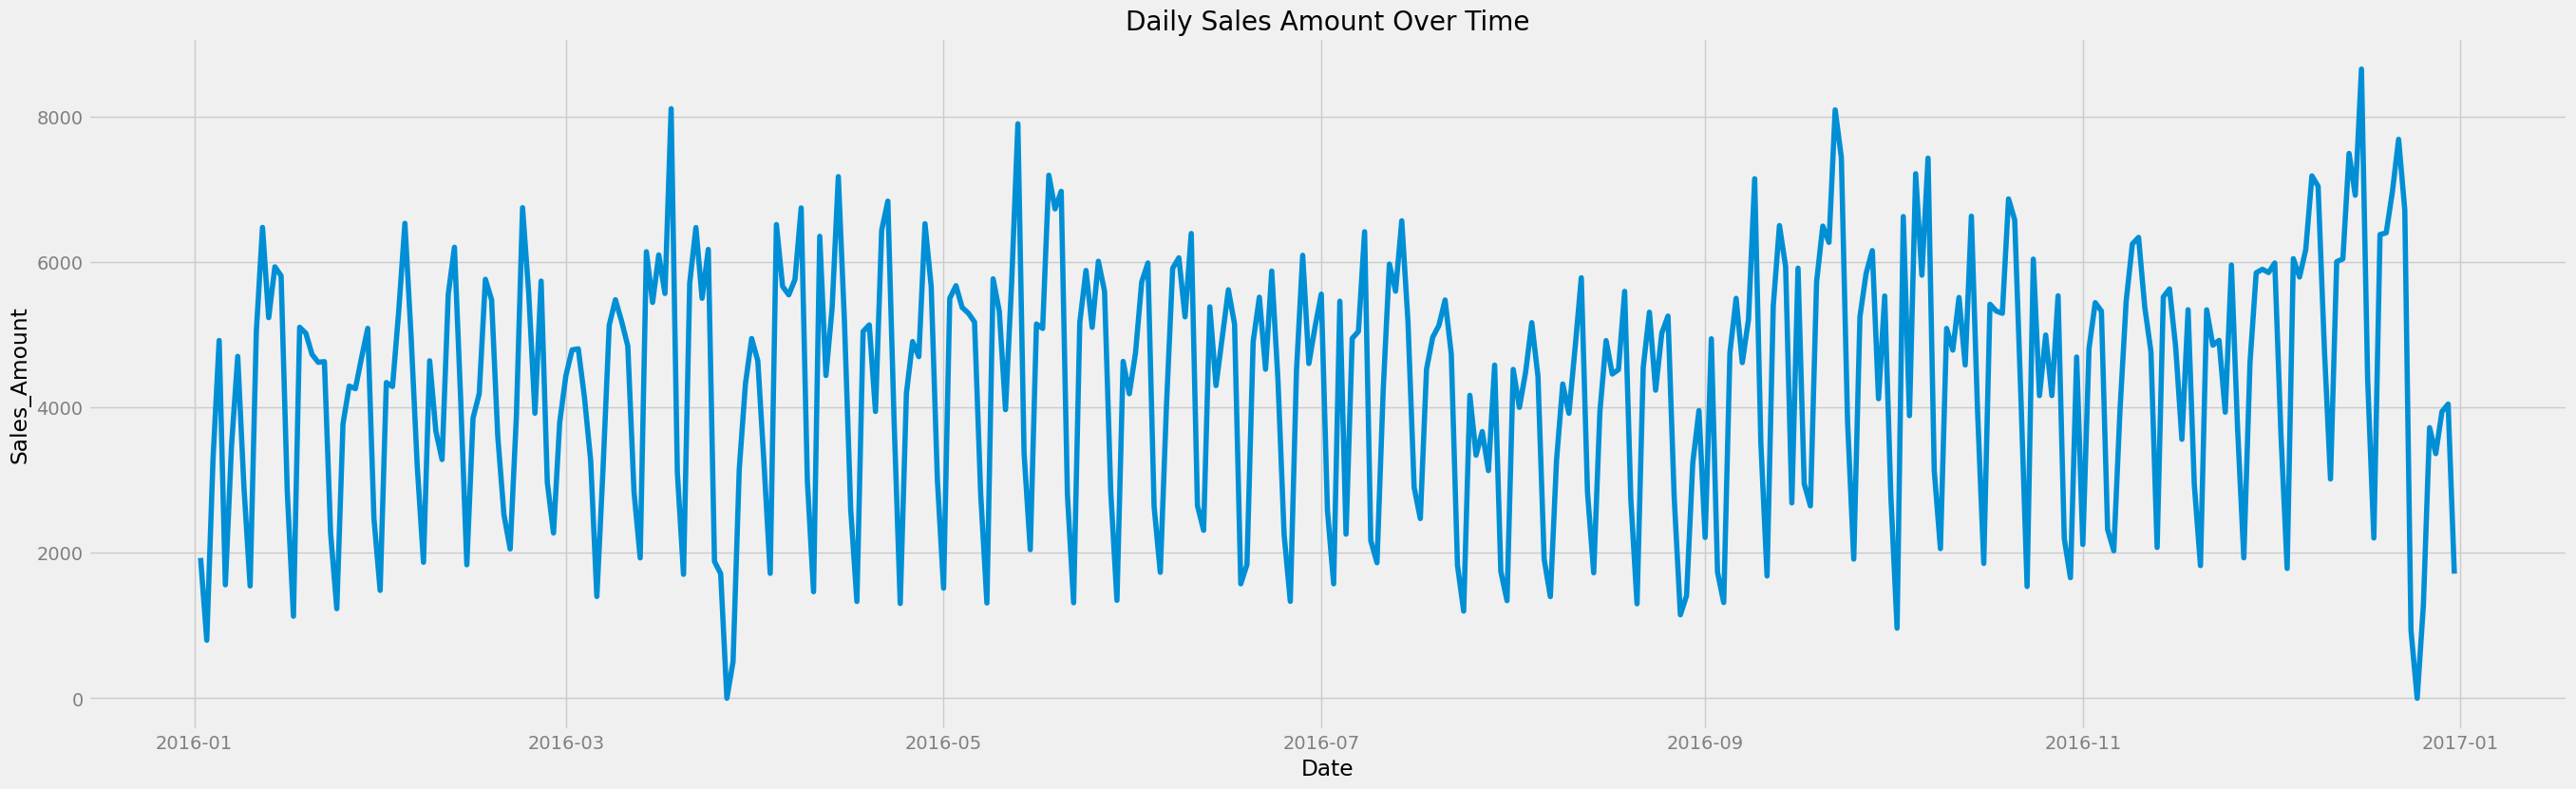

In [ ]:
#Visualization of the sales based on different dates

plt.figure(figsize=(30,9))
sns.lineplot(data=df_clean.resample('D', on='Date')['Sales_Amount'].agg('sum').reset_index(), x='Date', y='Sales_Amount')
plt.title('Daily Sales Amount Over Time')
plt.style.use('fivethirtyeight')
plt.xticks(color='gray')
plt.yticks(color='gray')
plt.show()

In [ ]:
#Average number of transaction per customer

df_clean.groupby('Customer_ID').agg(InvoiceNo=('Transaction_ID', 'nunique')).InvoiceNo.mean()

2.8588729281767957

Let's perfomr RFM segmentation analysis on the last 6 months

In [ ]:
df_clean1 = df_clean.loc[(df_clean['Date'] >= '2016-06-01') & (df_clean['Date'] < '2016-12-31')]

In [ ]:
#Number of customers
df_customers = df_clean1[['Customer_ID']].drop_duplicates()

#Recency
df_recency = df_clean1.groupby('Customer_ID').agg(MaxInvoiceDate=('Date','max')).reset_index()
df_recency['Recency'] = (pd.to_datetime('2023-09-15') - df_recency['MaxInvoiceDate']).dt.days

#Monetary
df_monetary = df_clean1.groupby('Customer_ID').agg(Monetary=('Sales_Amount', 'sum')).reset_index()

#Frequency
df_frequency = df_clean1.groupby('Customer_ID').agg(Frequency=('Transaction_ID', 'nunique')).reset_index()

In [ ]:
df_customers

,Customer_ID
54719,3771
54725,15979
54726,17195
54728,17767
54730,15956
...,...
131632,14811
131650,3232
131652,5751
131665,10765


In [ ]:
df_recency

,Customer_ID,MaxInvoiceDate,Recency
0,2,2016-06-19,2644
1,4,2016-11-09,2501
2,5,2016-07-05,2628
3,7,2016-10-05,2536
4,8,2016-06-21,2642
...,...,...,...
13716,22621,2016-12-10,2470
13717,22622,2016-12-16,2464
13718,22623,2016-12-21,2459
13719,22624,2016-12-02,2478


In [ ]:
df_frequency

,Customer_ID,Frequency
0,2,1
1,4,2
2,5,1
3,7,1
4,8,1
...,...,...
13716,22621,1
13717,22622,1
13718,22623,1
13719,22624,1


In [ ]:
df_monetary

,Customer_ID,Monetary
0,2,15.00
1,4,33.29
2,5,7.06
3,7,17.84
4,8,9.78
...,...,...
13716,22621,9.69
13717,22622,6.07
13718,22623,128.01
13719,22624,19.60


In [ ]:
df_rfm = pd.merge(df_customers, df_recency, on='Customer_ID', how='left')
df_rfm = pd.merge(df_rfm, df_monetary, on='Customer_ID', how='left')
df_rfm = pd.merge(df_rfm, df_frequency, on='Customer_ID', how='left')
df_rfm.drop(columns=['MaxInvoiceDate'], inplace=True)
df_rfm

,Customer_ID,Recency,Monetary,Frequency
0,3771,2662,156.46,1
1,15979,2458,355.34,16
2,17195,2636,60.84,3
3,17767,2513,204.25,6
4,15956,2474,143.54,11
...,...,...,...,...
13716,14811,2629,26.54,1
13717,3232,2601,12.89,1
13718,5751,2629,59.59,1
13719,10765,2629,1.19,1


In [ ]:
 df_rfm[['Recency','Frequency','Monetary']].describe(percentiles=[.01,.1,.25,.5,.75,.90,.95,.99]).T

,count,mean,std,min,1%,10%,25%,50%,75%,90%,95%,99%,max
Recency,13721.0,2528.225567,61.852345,2450.00,2450.00,2459.00,2473.00,2515.00,2574.00,2627.00,2646.00,2659.000,2662.00
Frequency,13721.0,2.724218,3.534755,1.00,1.00,1.00,1.00,1.00,3.00,6.00,9.00,17.000,81.00
Monetary,13721.0,68.084981,139.468652,0.06,1.77,5.46,10.25,23.86,61.74,163.49,284.26,709.682,2560.63


In [ ]:
df_rfm_clean = df_rfm.copy()
#Filtering out customers with only one purchase
df_rfm_clean = df_rfm_clean.loc[df_rfm_clean['Frequency'] > 1]
# Filtering out customers with more than 5 purchase
df_rfm_clean = df_rfm_clean.loc[df_rfm_clean['Frequency'] <= 5]
# Filtering out customers with more than 15.236€ purchases
df_rfm_clean = df_rfm_clean.loc[df_rfm_clean['Monetary'] <= 15236]

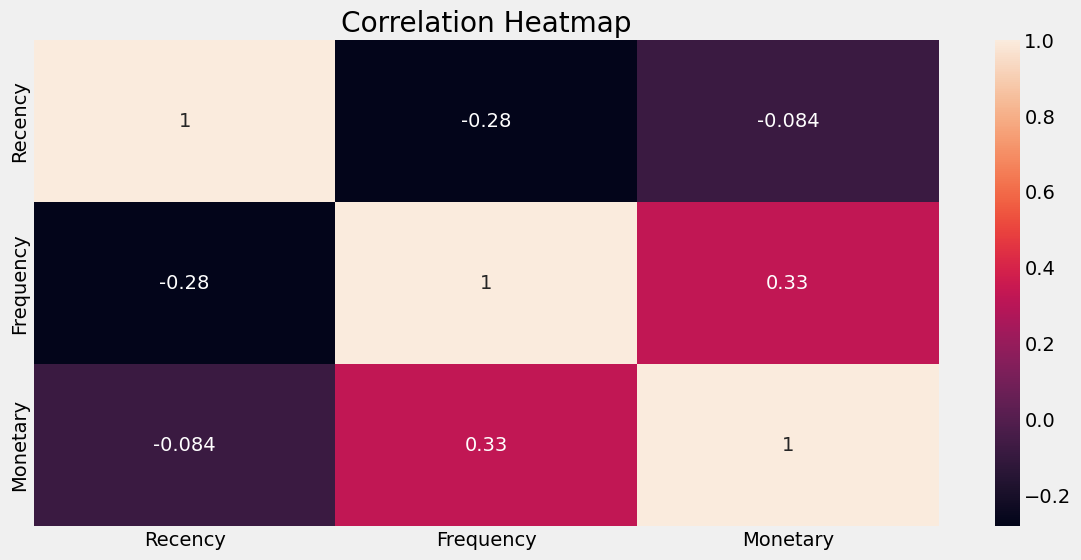

In [ ]:
corr_matrix = df_rfm_clean[['Recency','Frequency','Monetary']].corr()
corr_matrix

#Plot the correlation heatmap
plt.figure(figsize=(13, 6))
plt.style.use('fivethirtyeight')
sns.heatmap(corr_matrix, annot=True)
plt.title('Correlation Heatmap')
plt.show()

Monetary and Frequency seem to be correlated, while other features seem to have negative correlation

In [ ]:
df_rfm_clean['R_rank'] = df_rfm_clean['Recency'].rank(ascending=False)
df_rfm_clean['F_rank'] = df_rfm_clean['Frequency'].rank(ascending=True)
df_rfm_clean['M_rank'] = df_rfm_clean['Monetary'].rank(ascending=True)

# normalizing the rank of the customers
df_rfm_clean['R_rank_norm'] = (df_rfm_clean['R_rank']/df_rfm_clean['R_rank'].max())*100
df_rfm_clean['F_rank_norm'] = (df_rfm_clean['F_rank']/df_rfm_clean['F_rank'].max())*100
df_rfm_clean['M_rank_norm'] = (df_rfm_clean['F_rank']/df_rfm_clean['M_rank'].max())*100

df_rfm_clean.drop(columns=['R_rank', 'F_rank', 'M_rank'], inplace=True)
df_rfm_clean

,Customer_ID,Recency,Monetary,Frequency,R_rank_norm,F_rank_norm,M_rank_norm
2,17195,2636,60.84,3,2.041869,66.100784,62.903885
8,6881,2548,78.80,4,24.120862,87.042011,82.832311
9,18416,2584,352.05,4,11.570589,87.042011,82.832311
10,12008,2500,122.20,5,49.159534,100.000000,95.163599
14,11548,2484,58.73,4,61.668557,87.042011,82.832311
...,...,...,...,...,...,...,...
13627,38,2632,12.62,2,2.474992,26.517675,25.235174
13643,5343,2631,66.76,3,2.588429,66.100784,62.903885
13645,3404,2631,19.49,2,2.588429,26.517675,25.235174
13657,9902,2631,210.90,2,2.588429,26.517675,25.235174


In [ ]:
#Computing the RFM score

RECENCY_WEIGHT = .5
FREQUENCY_WEIGHT = .25
MONETARY_WEIGHT = .25

df_rfm_clean['RFMScore'] = (
    RECENCY_WEIGHT * df_rfm_clean['R_rank_norm'] +
    FREQUENCY_WEIGHT * df_rfm_clean['F_rank_norm'] +
    MONETARY_WEIGHT * df_rfm_clean['M_rank_norm'])

df_rfm_clean

,Customer_ID,Recency,Monetary,Frequency,R_rank_norm,F_rank_norm,M_rank_norm,RFMScore
2,17195,2636,60.84,3,2.041869,66.100784,62.903885,33.272102
8,6881,2548,78.80,4,24.120862,87.042011,82.832311,54.529012
9,18416,2584,352.05,4,11.570589,87.042011,82.832311,48.253875
10,12008,2500,122.20,5,49.159534,100.000000,95.163599,73.370667
14,11548,2484,58.73,4,61.668557,87.042011,82.832311,73.302859
...,...,...,...,...,...,...,...,...
13627,38,2632,12.62,2,2.474992,26.517675,25.235174,14.175708
13643,5343,2631,66.76,3,2.588429,66.100784,62.903885,33.545382
13645,3404,2631,19.49,2,2.588429,26.517675,25.235174,14.232427
13657,9902,2631,210.90,2,2.588429,26.517675,25.235174,14.232427


In [ ]:
df_rfm_clean[['RFMScore']].describe(percentiles=[.01,.1,.25,.5,.75,.90,.95,.99]).T

,count,mean,std,min,1%,10%,25%,50%,75%,90%,95%,99%,max
RFMScore,4890.0,50.859657,22.577566,12.953681,13.548452,19.971315,32.330808,50.725953,68.775686,82.251167,88.684681,96.592746,98.7909


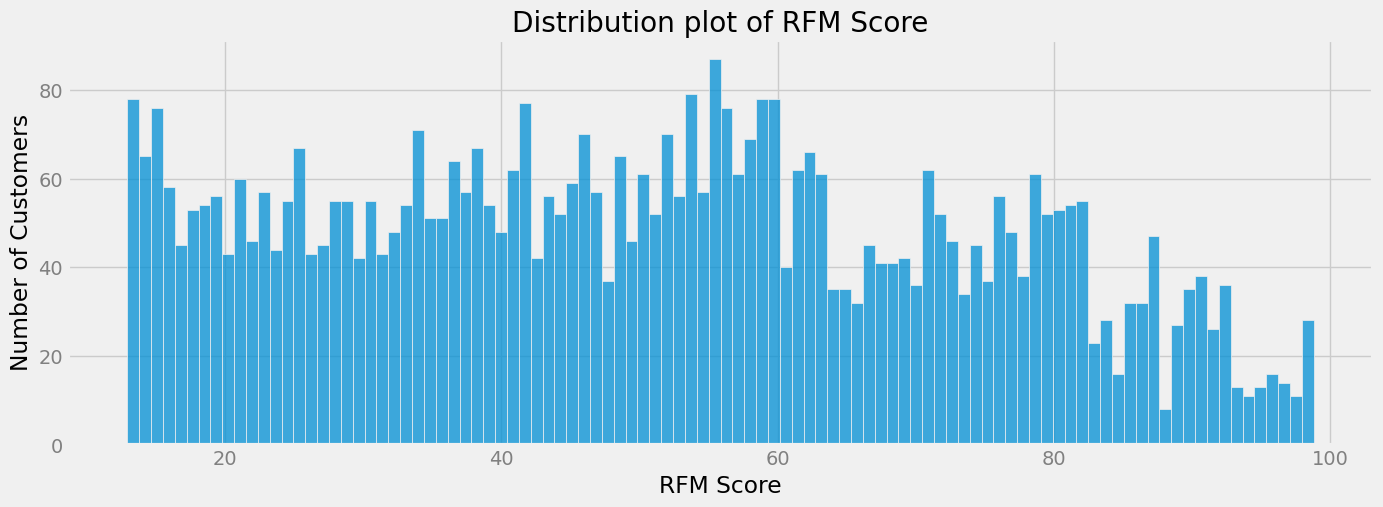

In [ ]:
#Visualasing the distribution of the RFM score
plt.figure(figsize=(15, 5))
plt.style.use('fivethirtyeight')
sns.histplot(df_rfm_clean, x='RFMScore', bins=100)
plt.xticks(color='gray')
plt.yticks(color='gray')
plt.xlabel('RFM Score')
plt.ylabel('Number of Customers')
plt.title('Distribution plot of RFM Score')
plt.show()

In [ ]:
 #Assinging RFM segments

 df_rfm_clean["RFMSegment"] = np.where(
    df_rfm_clean['RFMScore'] > 80, "4. Elite Customer",
        np.where(df_rfm_clean['RFMScore'] > 65, "3. High value Customer",
            np.where(df_rfm_clean['RFMScore'] > 30, "2. Medium value Customer", "1. Low value Customer")))

In [ ]:
rfm_segment_order = ['1. Low value Customer',
                     '2. Medium value Customer',
                     '3. High value Customer',
                     '4. Elite Customer']

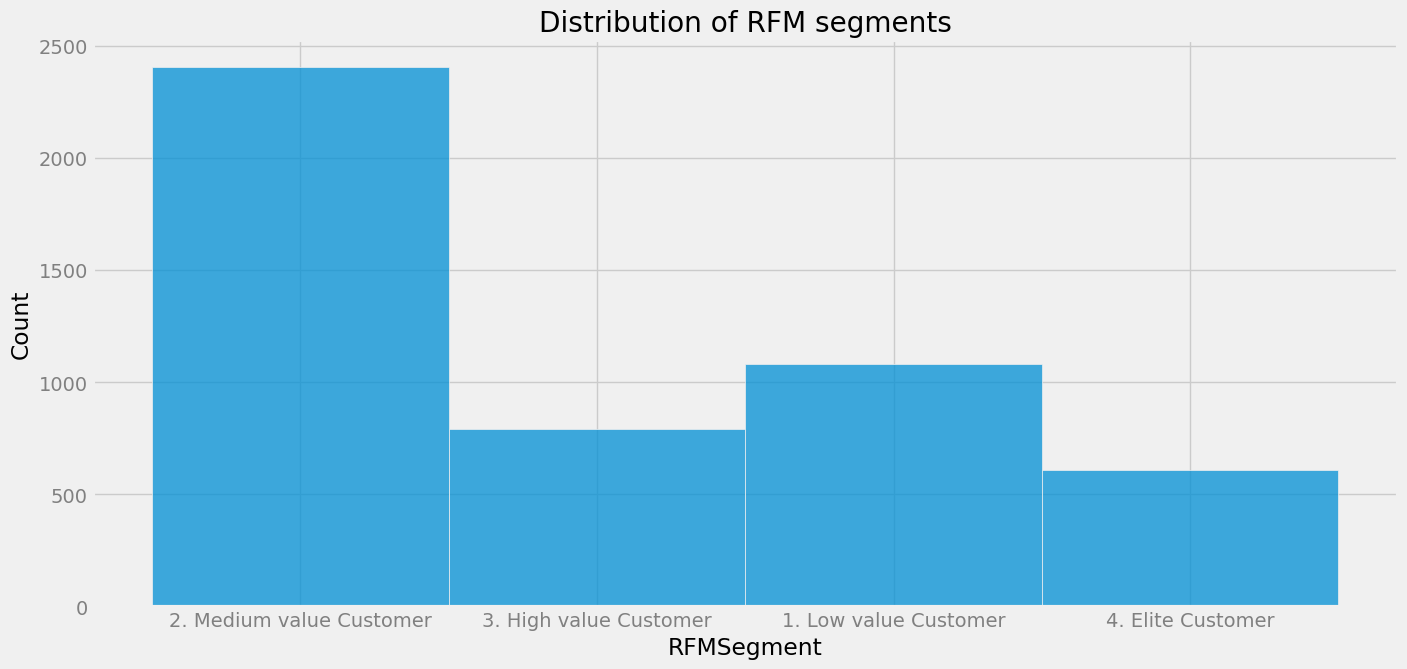

In [ ]:
#Visulization of the distribution of RFM segments

plt.figure(figsize=(15, 7))
plt.style.use('fivethirtyeight')
sns.histplot(x='RFMSegment', data=df_rfm_clean)
plt.xticks(color='gray')
plt.yticks(color='gray')
plt.title('Distribution of RFM segments')
plt.show()

In [ ]:
#Visualisation of the exact numbers

df_rfm_clean.groupby("RFMSegment")["Customer_ID"].count()

RFMSegment
1. Low value Customer       1083
2. Medium value Customer    2408
3. High value Customer       791
4. Elite Customer            608
Name: Customer_ID, dtype: int64

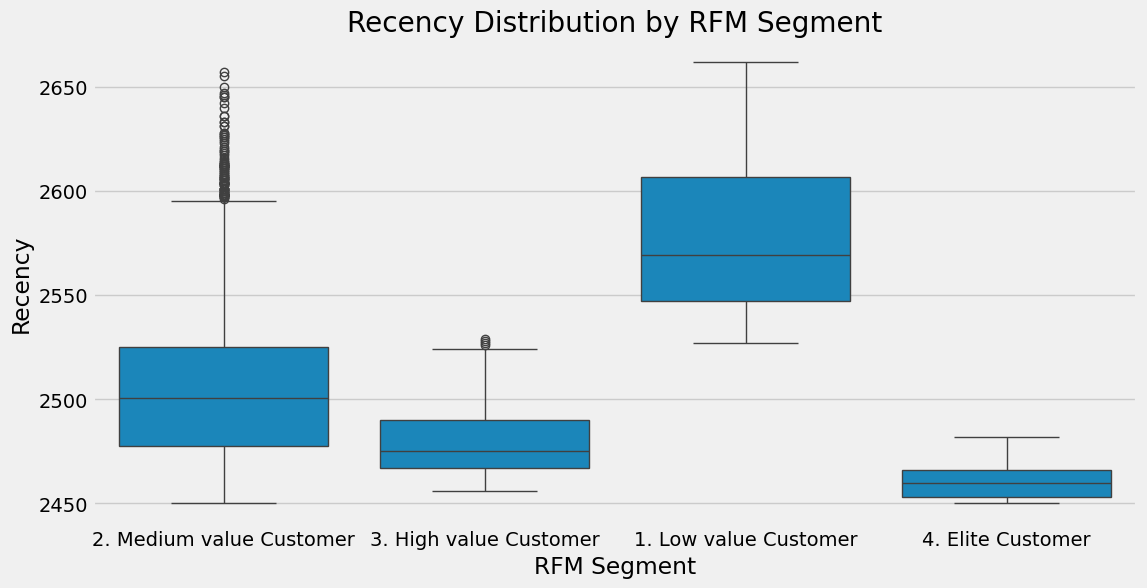

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_rfm_clean, x='RFMSegment', y='Recency')
plt.title('Recency Distribution by RFM Segment')
plt.xlabel('RFM Segment')
plt.ylabel('Recency')
plt.show()

Text(0, 0.5, 'Frequency')

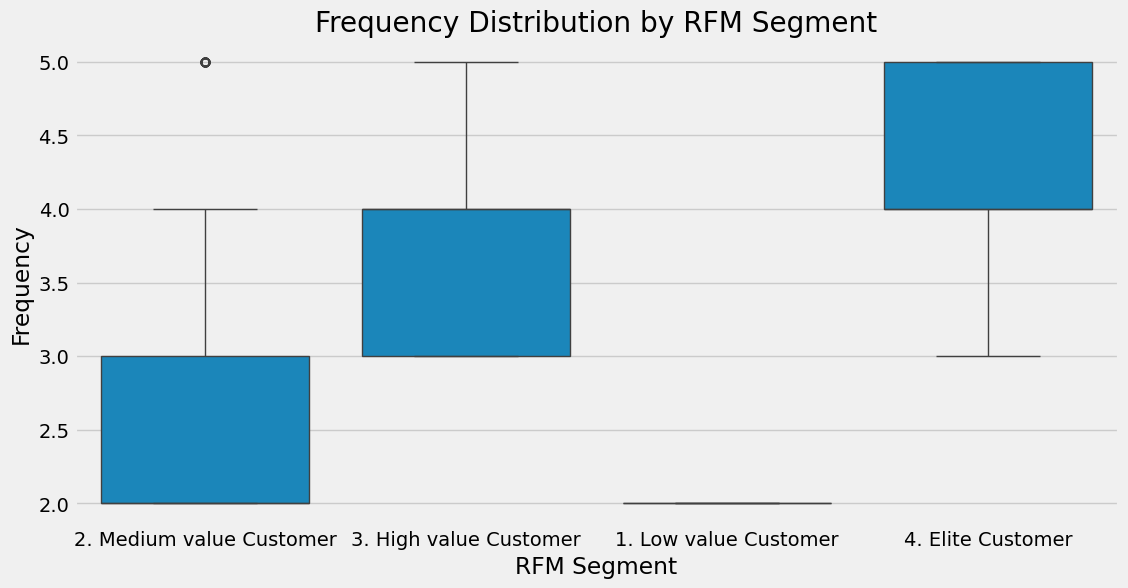

In [ ]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df_rfm_clean, x='RFMSegment', y='Frequency')
plt.title('Frequency Distribution by RFM Segment')
plt.xlabel('RFM Segment')
plt.ylabel('Frequency')

Text(0, 0.5, 'Monetary')

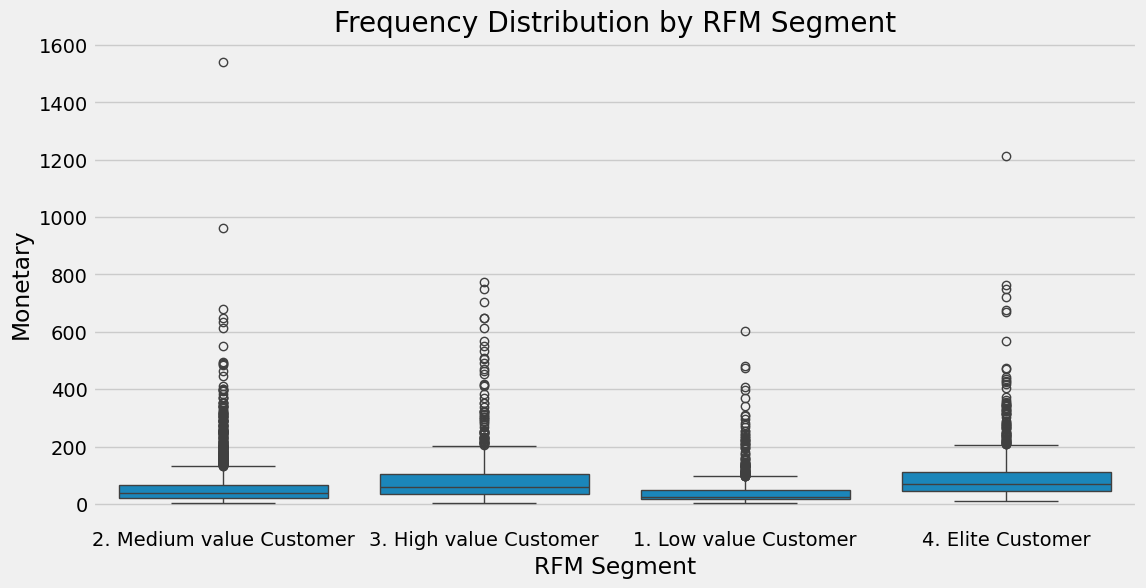

In [ ]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df_rfm_clean, x='RFMSegment', y='Monetary')
plt.title('Frequency Distribution by RFM Segment')
plt.xlabel('RFM Segment')
plt.ylabel('Monetary')

In [ ]:
#Visualization of the average recency, frequency and monetary based on the RFM segment

(
    df_rfm_clean
    .groupby("RFMSegment")
    .agg(
        avg_recency=("Recency", "mean")
        , avg_frequency=("Frequency", "mean")
        , avg_monetary=("Monetary", "mean")
    )
)

,avg_recency,avg_frequency,avg_monetary
RFMSegment,,,
1. Low value Customer,2576.923361,2.000000,42.621533
2. Medium value Customer,2506.986711,2.560631,59.632907
3. High value Customer,2478.595449,3.686473,88.480253
4. Elite Customer,2460.827303,4.333882,103.796859


Let's try to see what the RFM segmentation was like in the first 6 months as well and compare them to the last 6 months

In [ ]:
df_clean2 = df_clean.loc[(df_clean['Date'] >= '2016-01-02') & (df_clean['Date'] < '2016-05-31')]

In [ ]:
#Number of customers
df_customers1 = df_clean2[['Customer_ID']].drop_duplicates()

#Recency
df_recency1 = df_clean2.groupby('Customer_ID').agg(MaxInvoiceDate=('Date','max')).reset_index()
df_recency1['Recency'] = (pd.to_datetime('2023-09-15') - df_recency['MaxInvoiceDate']).dt.days

#Monetary
df_monetary1 = df_clean2.groupby('Customer_ID').agg(Monetary=('Sales_Amount', 'sum')).reset_index()

#Frequency
df_frequency1 = df_clean2.groupby('Customer_ID').agg(Frequency=('Transaction_ID', 'nunique')).reset_index()

In [ ]:
df_customers1

,Customer_ID
0,2547
1,822
2,3686
3,3719
4,9200
...,...
54337,10984
54339,13184
54341,16106
54347,10846


In [ ]:
df_recency1

,Customer_ID,MaxInvoiceDate,Recency
0,1,2016-01-22,2644
1,2,2016-03-24,2501
2,3,2016-01-02,2628
3,5,2016-05-28,2536
4,6,2016-03-31,2642
...,...,...,...
13334,22219,2016-05-17,2589
13335,22221,2016-05-21,2517
13336,22225,2016-05-15,2557
13337,22234,2016-05-11,2505


In [ ]:
df_frequency1

,Customer_ID,Frequency
0,1,1
1,2,1
2,3,1
3,5,4
4,6,1
...,...,...
13334,22219,1
13335,22221,1
13336,22225,1
13337,22234,1


In [ ]:
df_monetary1

,Customer_ID,Monetary
0,1,16.29
1,2,7.77
2,3,10.92
3,5,71.76
4,6,25.55
...,...,...
13334,22219,15.32
13335,22221,11.04
13336,22225,3.21
13337,22234,10.43


In [ ]:
df_rfm1 = pd.merge(df_customers1, df_recency1, on='Customer_ID', how='left')
df_rfm1 = pd.merge(df_rfm1, df_monetary1, on='Customer_ID', how='left')
df_rfm1 = pd.merge(df_rfm1, df_frequency1, on='Customer_ID', how='left')
df_rfm1.drop(columns=['MaxInvoiceDate'], inplace=True)
df_rfm1

,Customer_ID,Recency,Monetary,Frequency
0,2547,2559,121.36,7
1,822,2631,20.40,3
2,3686,2525,405.44,15
3,3719,2627,420.72,10
4,9200,2450,18.01,2
...,...,...,...,...
13334,10984,2504,6.97,1
13335,13184,2461,9.51,1
13336,16106,2584,44.74,1
13337,10846,2471,16.10,1


In [ ]:
df_rfm_clean1 = df_rfm1.copy()
#Filtering out customers with only one purchase
df_rfm_clean1 = df_rfm_clean1.loc[df_rfm_clean1['Frequency'] > 1]
# Filtering out customers with more than 5 purchase
df_rfm_clean1 = df_rfm_clean1.loc[df_rfm_clean1['Frequency'] <= 5]
# Filtering out customers with more than 15.236€ purchases
df_rfm_clean1 = df_rfm_clean1.loc[df_rfm_clean1['Monetary'] <= 15236]

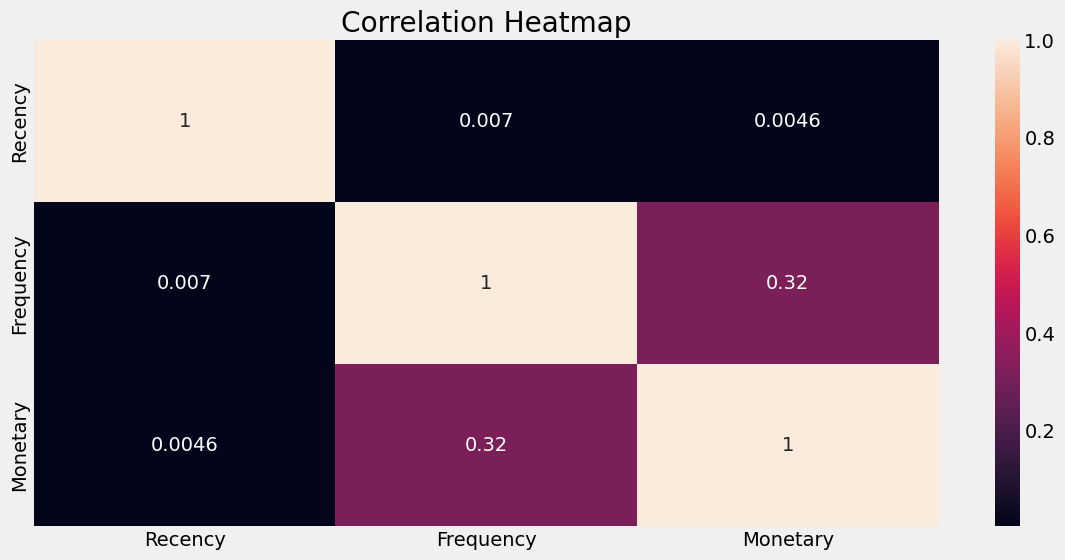

In [ ]:
corr_matrix = df_rfm_clean1[['Recency','Frequency','Monetary']].corr()
corr_matrix

#Plot the correlation heatmap
plt.figure(figsize=(13, 6))
plt.style.use('fivethirtyeight')
sns.heatmap(corr_matrix, annot=True)
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
 df_rfm1[['Recency','Frequency','Monetary']].describe(percentiles=[.01,.1,.25,.5,.75,.90,.95,.99]).T

,count,mean,std,min,1%,10%,25%,50%,75%,90%,95%,99%,max
Recency,13339.0,2529.609941,62.076896,2450.0,2450.0000,2459.000,2473.00,2518.00,2576.00,2629.000,2647.000,2659.000,2662.00
Frequency,13339.0,2.024065,1.963898,1.0,1.0000,1.000,1.00,1.00,2.00,4.000,6.000,9.620,45.00
Monetary,13339.0,47.825531,82.735609,0.3,1.7576,4.856,8.87,19.62,49.74,116.842,190.536,410.341,1600.01


In [ ]:
df_rfm_clean1['R_rank'] = df_rfm_clean1['Recency'].rank(ascending=False)
df_rfm_clean1['F_rank'] = df_rfm_clean1['Frequency'].rank(ascending=True)
df_rfm_clean1['M_rank'] = df_rfm_clean1['Monetary'].rank(ascending=True)

# normalizing the rank of the customers
df_rfm_clean1['R_rank_norm'] = (df_rfm_clean1['R_rank']/df_rfm_clean1['R_rank'].max())*100
df_rfm_clean1['F_rank_norm'] = (df_rfm_clean1['F_rank']/df_rfm_clean1['F_rank'].max())*100
df_rfm_clean1['M_rank_norm'] = (df_rfm_clean1['F_rank']/df_rfm_clean1['M_rank'].max())*100

df_rfm_clean1.drop(columns=['R_rank', 'F_rank', 'M_rank'], inplace=True)
df_rfm_clean1

,Customer_ID,Recency,Monetary,Frequency,R_rank_norm,F_rank_norm,M_rank_norm
1,822,2631,20.40,3,9.832811,67.294576,64.494708
4,9200,2450,18.01,2,100.000000,27.097542,25.970118
9,7548,2499,29.03,3,59.059561,67.294576,64.494708
10,6865,2543,30.16,4,38.819227,88.026416,84.363976
12,592,2583,56.73,4,22.894462,88.026416,84.363976
...,...,...,...,...,...,...,...
13148,9745,2478,79.18,2,72.643678,27.097542,25.970118
13208,3961,2453,20.75,2,96.593521,27.097542,25.970118
13245,15415,2579,19.71,2,24.085684,27.097542,25.970118
13279,10556,2450,12.31,2,100.000000,27.097542,25.970118


In [ ]:
#Computing the RFM score

df_rfm_clean1['RFMScore'] = (
    RECENCY_WEIGHT * df_rfm_clean1['R_rank_norm'] +
    FREQUENCY_WEIGHT * df_rfm_clean1['F_rank_norm'] +
    MONETARY_WEIGHT * df_rfm_clean1['M_rank_norm'])

df_rfm_clean1

,Customer_ID,Recency,Monetary,Frequency,R_rank_norm,F_rank_norm,M_rank_norm,RFMScore
1,822,2631,20.40,3,9.832811,67.294576,64.494708,37.863727
4,9200,2450,18.01,2,100.000000,27.097542,25.970118,63.266915
9,7548,2499,29.03,3,59.059561,67.294576,64.494708,62.477102
10,6865,2543,30.16,4,38.819227,88.026416,84.363976,62.507211
12,592,2583,56.73,4,22.894462,88.026416,84.363976,54.544829
...,...,...,...,...,...,...,...,...
13148,9745,2478,79.18,2,72.643678,27.097542,25.970118,49.588754
13208,3961,2453,20.75,2,96.593521,27.097542,25.970118,61.563676
13245,15415,2579,19.71,2,24.085684,27.097542,25.970118,25.309757
13279,10556,2450,12.31,2,100.000000,27.097542,25.970118,63.266915


In [ ]:
df_rfm_clean1[['RFMScore']].describe(percentiles=[.01,.1,.25,.5,.75,.90,.95,.99]).T

,count,mean,std,min,1%,10%,25%,50%,75%,90%,95%,99%,max
RFMScore,4819.0,50.730818,19.804707,13.34006,14.353645,23.214669,35.956726,50.732065,63.348471,78.326618,84.461414,94.612929,98.959846


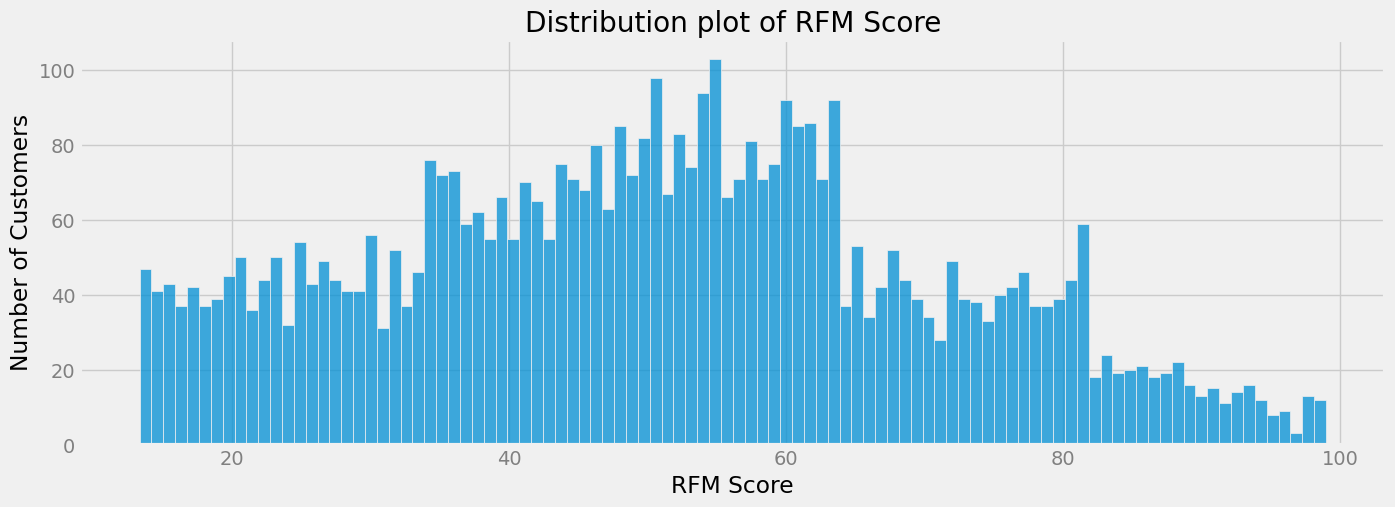

In [ ]:
#Visualasing the distribution of the RFM score

plt.figure(figsize=(15, 5))
plt.style.use('fivethirtyeight')
sns.histplot(df_rfm_clean1, x='RFMScore', bins=100)
plt.xticks(color='gray')
plt.yticks(color='gray')
plt.xlabel('RFM Score')
plt.ylabel('Number of Customers')
plt.title('Distribution plot of RFM Score')
plt.show()

In [ ]:
 #Assinging RFM segments

 df_rfm_clean1["RFMSegment"] = np.where(
    df_rfm_clean1['RFMScore'] > 80, "4. Elite Customer",
        np.where(df_rfm_clean1['RFMScore'] > 65, "3. High value Customer",
            np.where(df_rfm_clean1['RFMScore'] > 30, "2. Medium value Customer", "1. Low value Customer")))

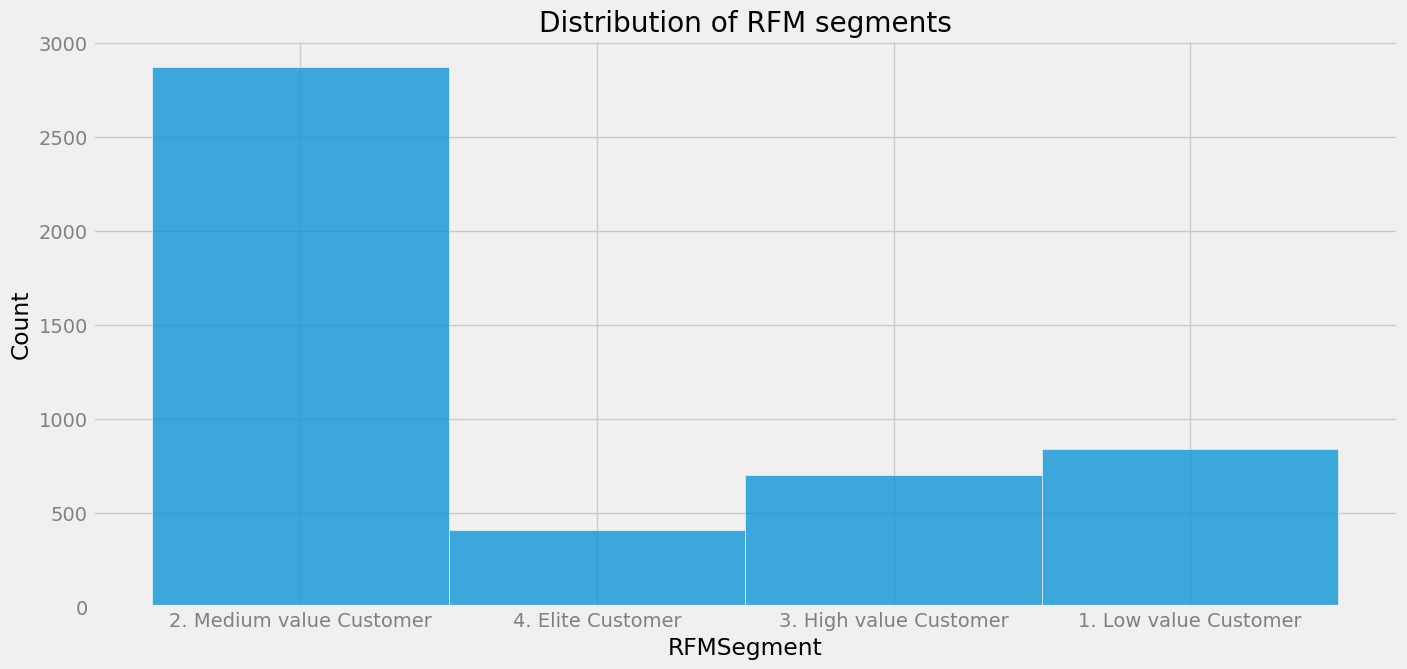

In [ ]:
#Visulization of the distribution of RFM segments

plt.figure(figsize=(15, 7))
plt.style.use('fivethirtyeight')
sns.histplot(x='RFMSegment', data=df_rfm_clean1)
plt.xticks(color='gray')
plt.yticks(color='gray')
plt.title('Distribution of RFM segments')
plt.show()

In [ ]:
#Visualisation of the exact numbers

df_rfm_clean1.groupby("RFMSegment")["Customer_ID"].count()

RFMSegment
1. Low value Customer        836
2. Medium value Customer    2873
3. High value Customer       702
4. Elite Customer            408
Name: Customer_ID, dtype: int64

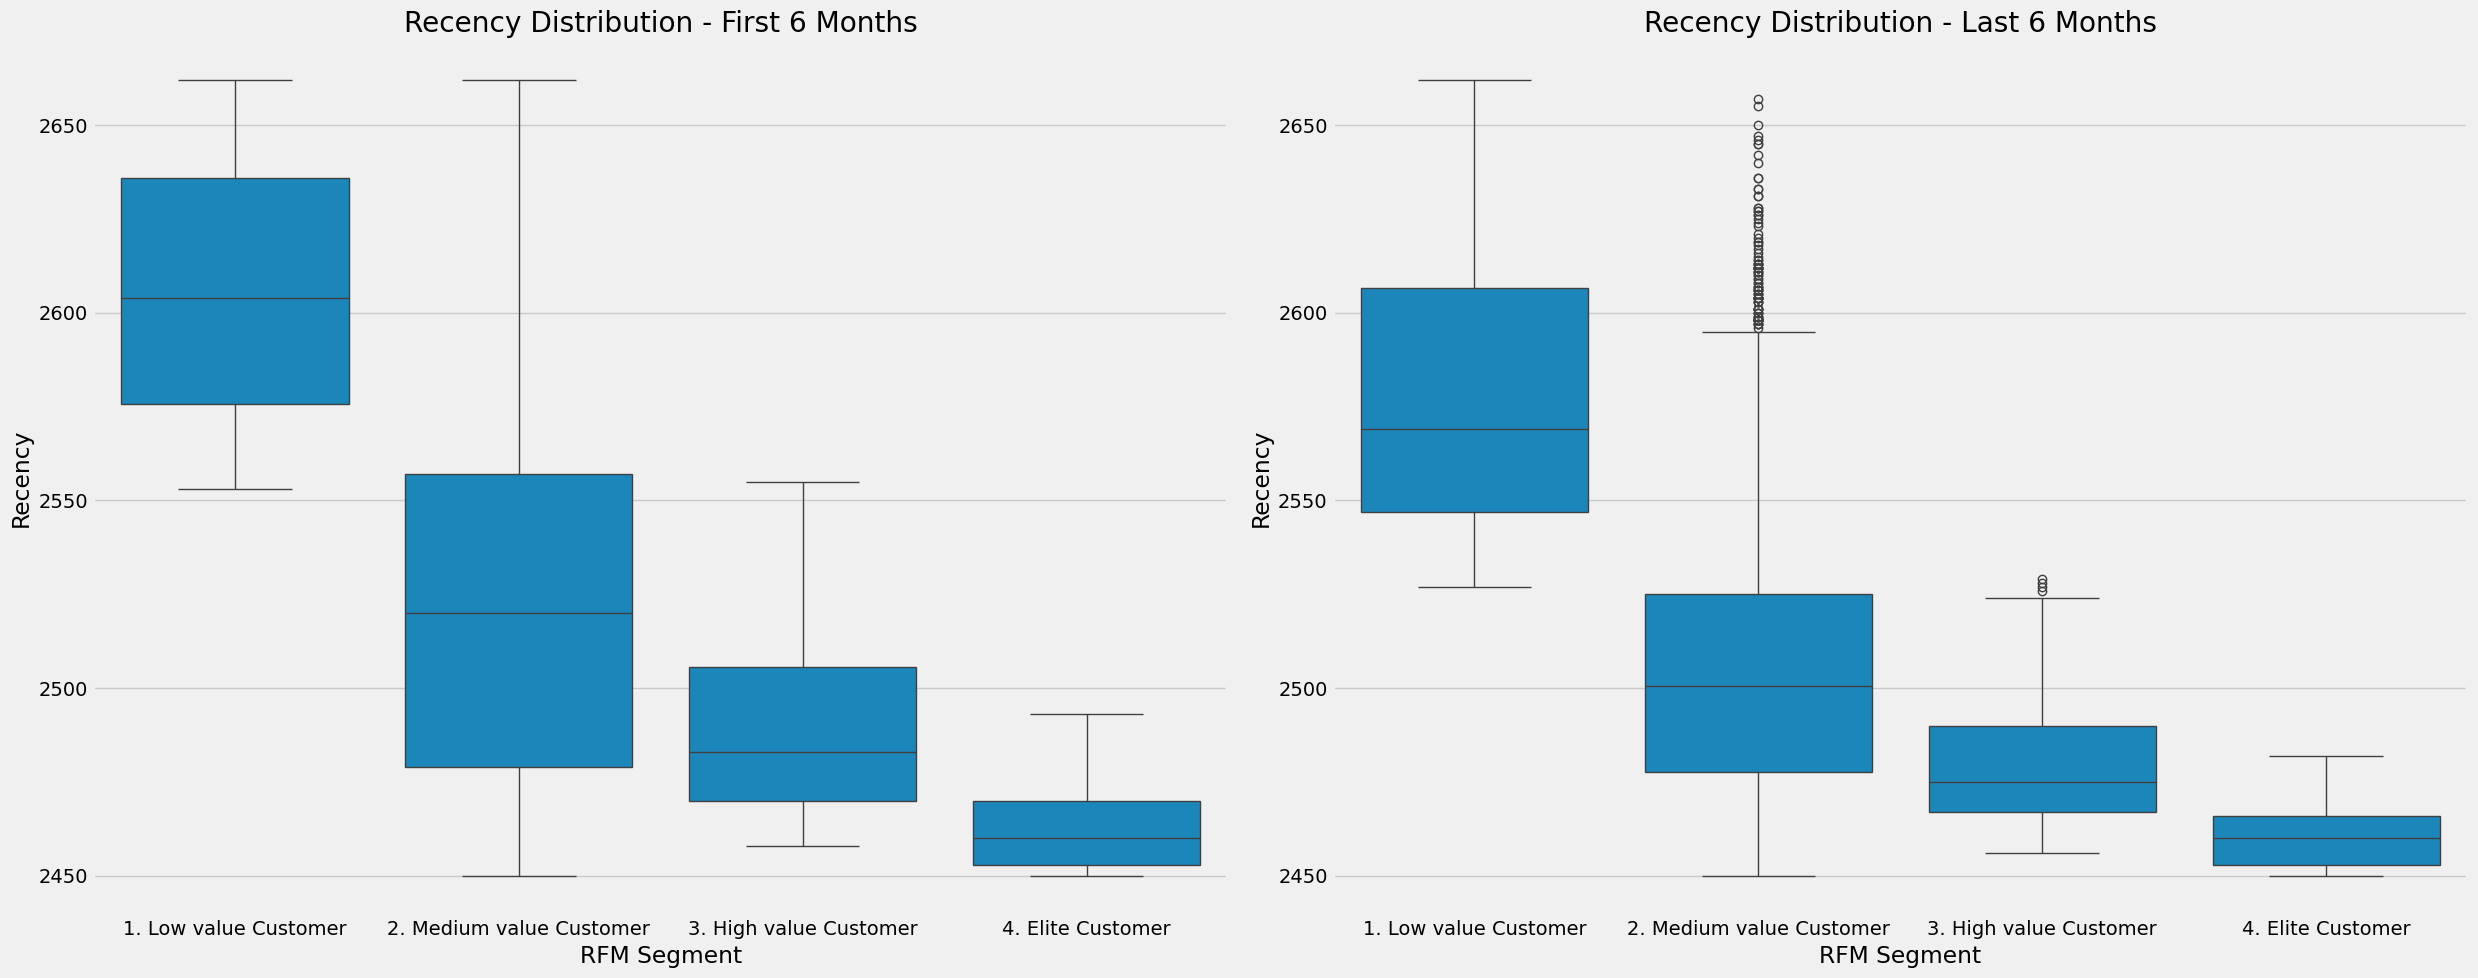

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(25, 10))

sns.boxplot(ax=axes[0], data=df_rfm_clean1, x='RFMSegment', y='Recency', order=rfm_segment_order)
axes[0].set_title('Recency Distribution - First 6 Months')
axes[0].set_xlabel('RFM Segment')
axes[0].set_ylabel('Recency')

sns.boxplot(ax=axes[1], data=df_rfm_clean, x='RFMSegment', y='Recency', order=rfm_segment_order)
axes[1].set_title('Recency Distribution - Last 6 Months')
axes[1].set_xlabel('RFM Segment')
axes[1].set_ylabel('Recency')

plt.tight_layout()
plt.show()


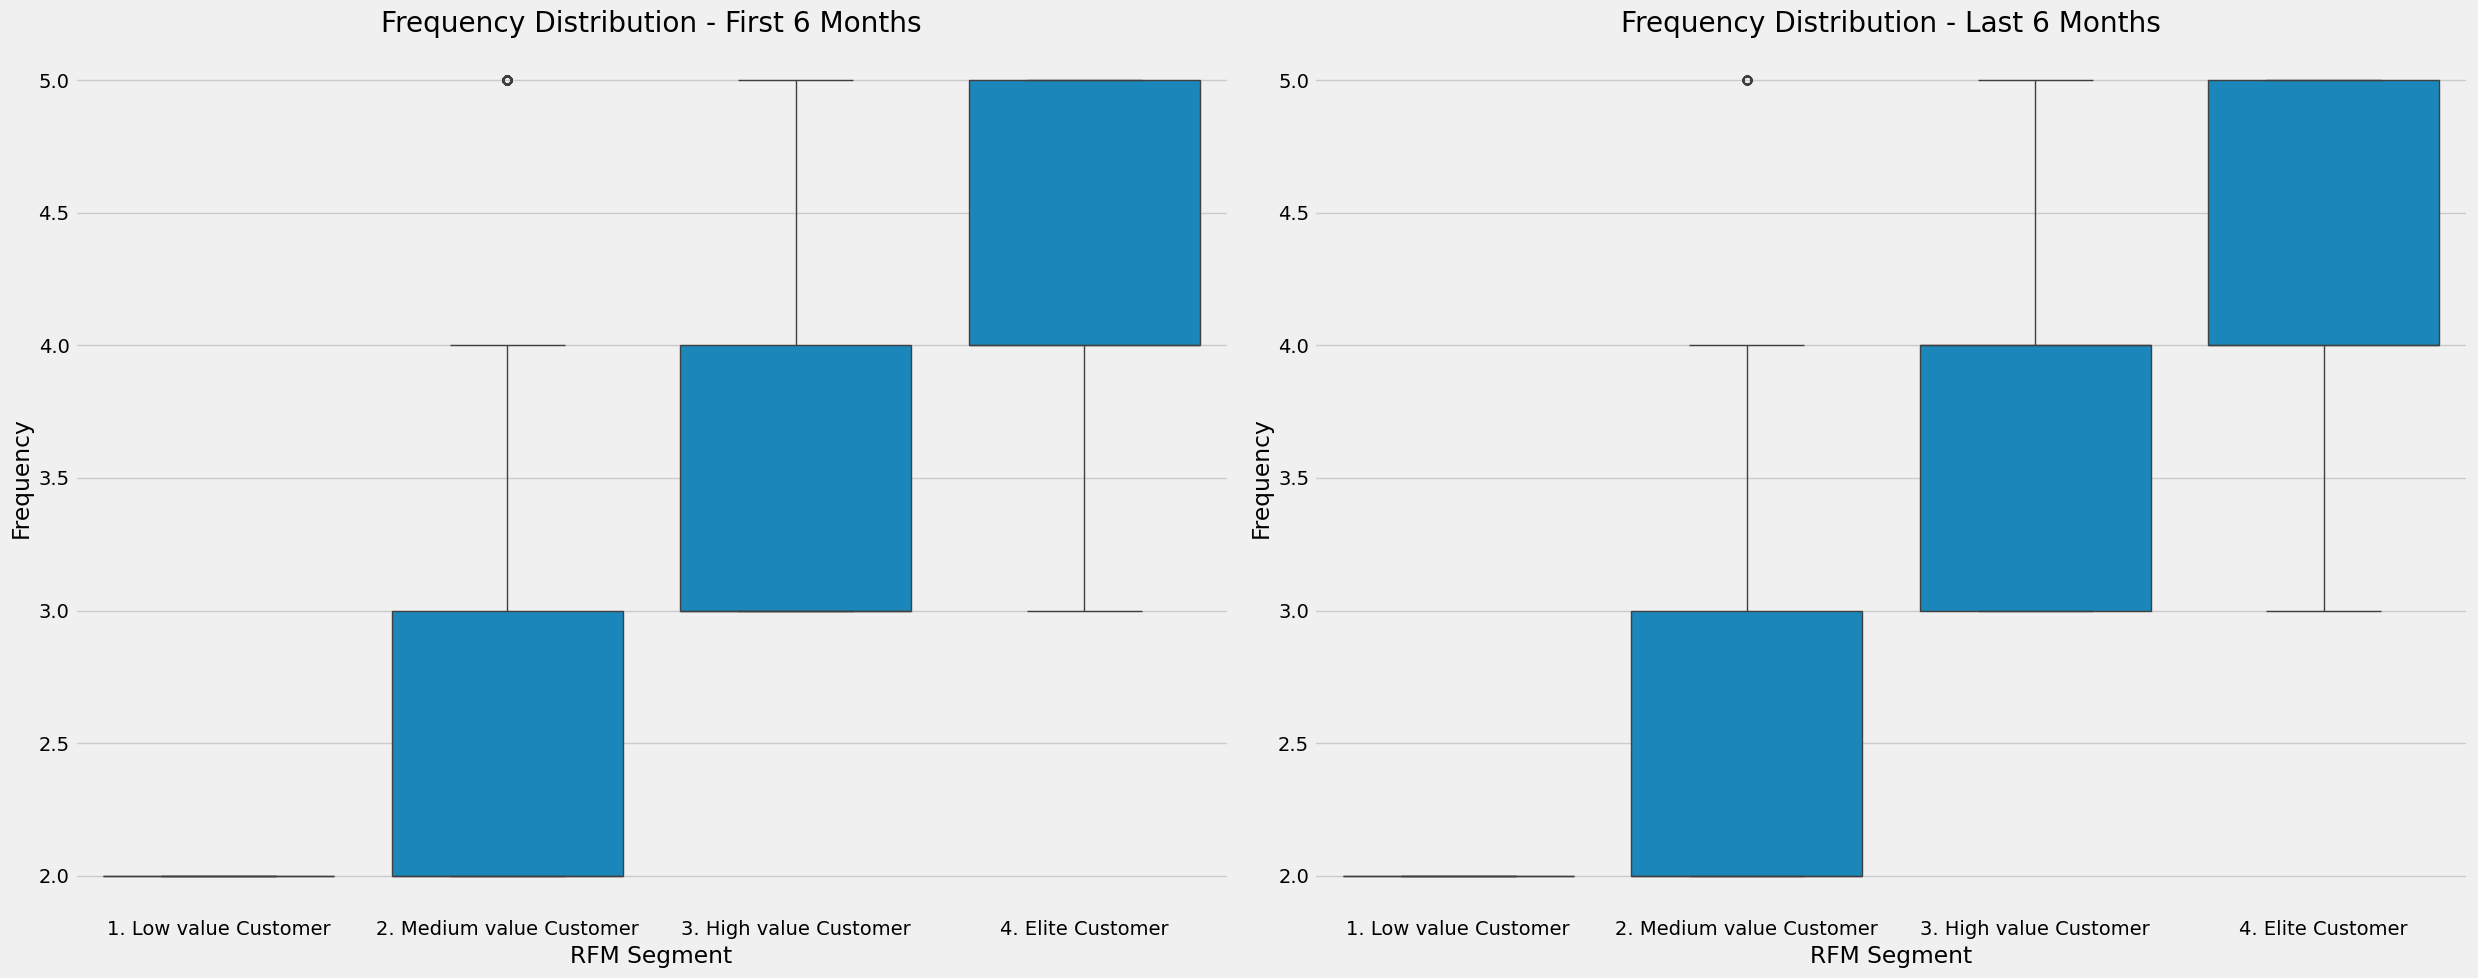

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(25, 10))

sns.boxplot(ax=axes[0], data=df_rfm_clean1, x='RFMSegment', y='Frequency', order=rfm_segment_order)
axes[0].set_title('Frequency Distribution - First 6 Months')
axes[0].set_xlabel('RFM Segment')
axes[0].set_ylabel('Frequency')

sns.boxplot(ax=axes[1], data=df_rfm_clean, x='RFMSegment', y='Frequency', order=rfm_segment_order)
axes[1].set_title('Frequency Distribution - Last 6 Months')
axes[1].set_xlabel('RFM Segment')
axes[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

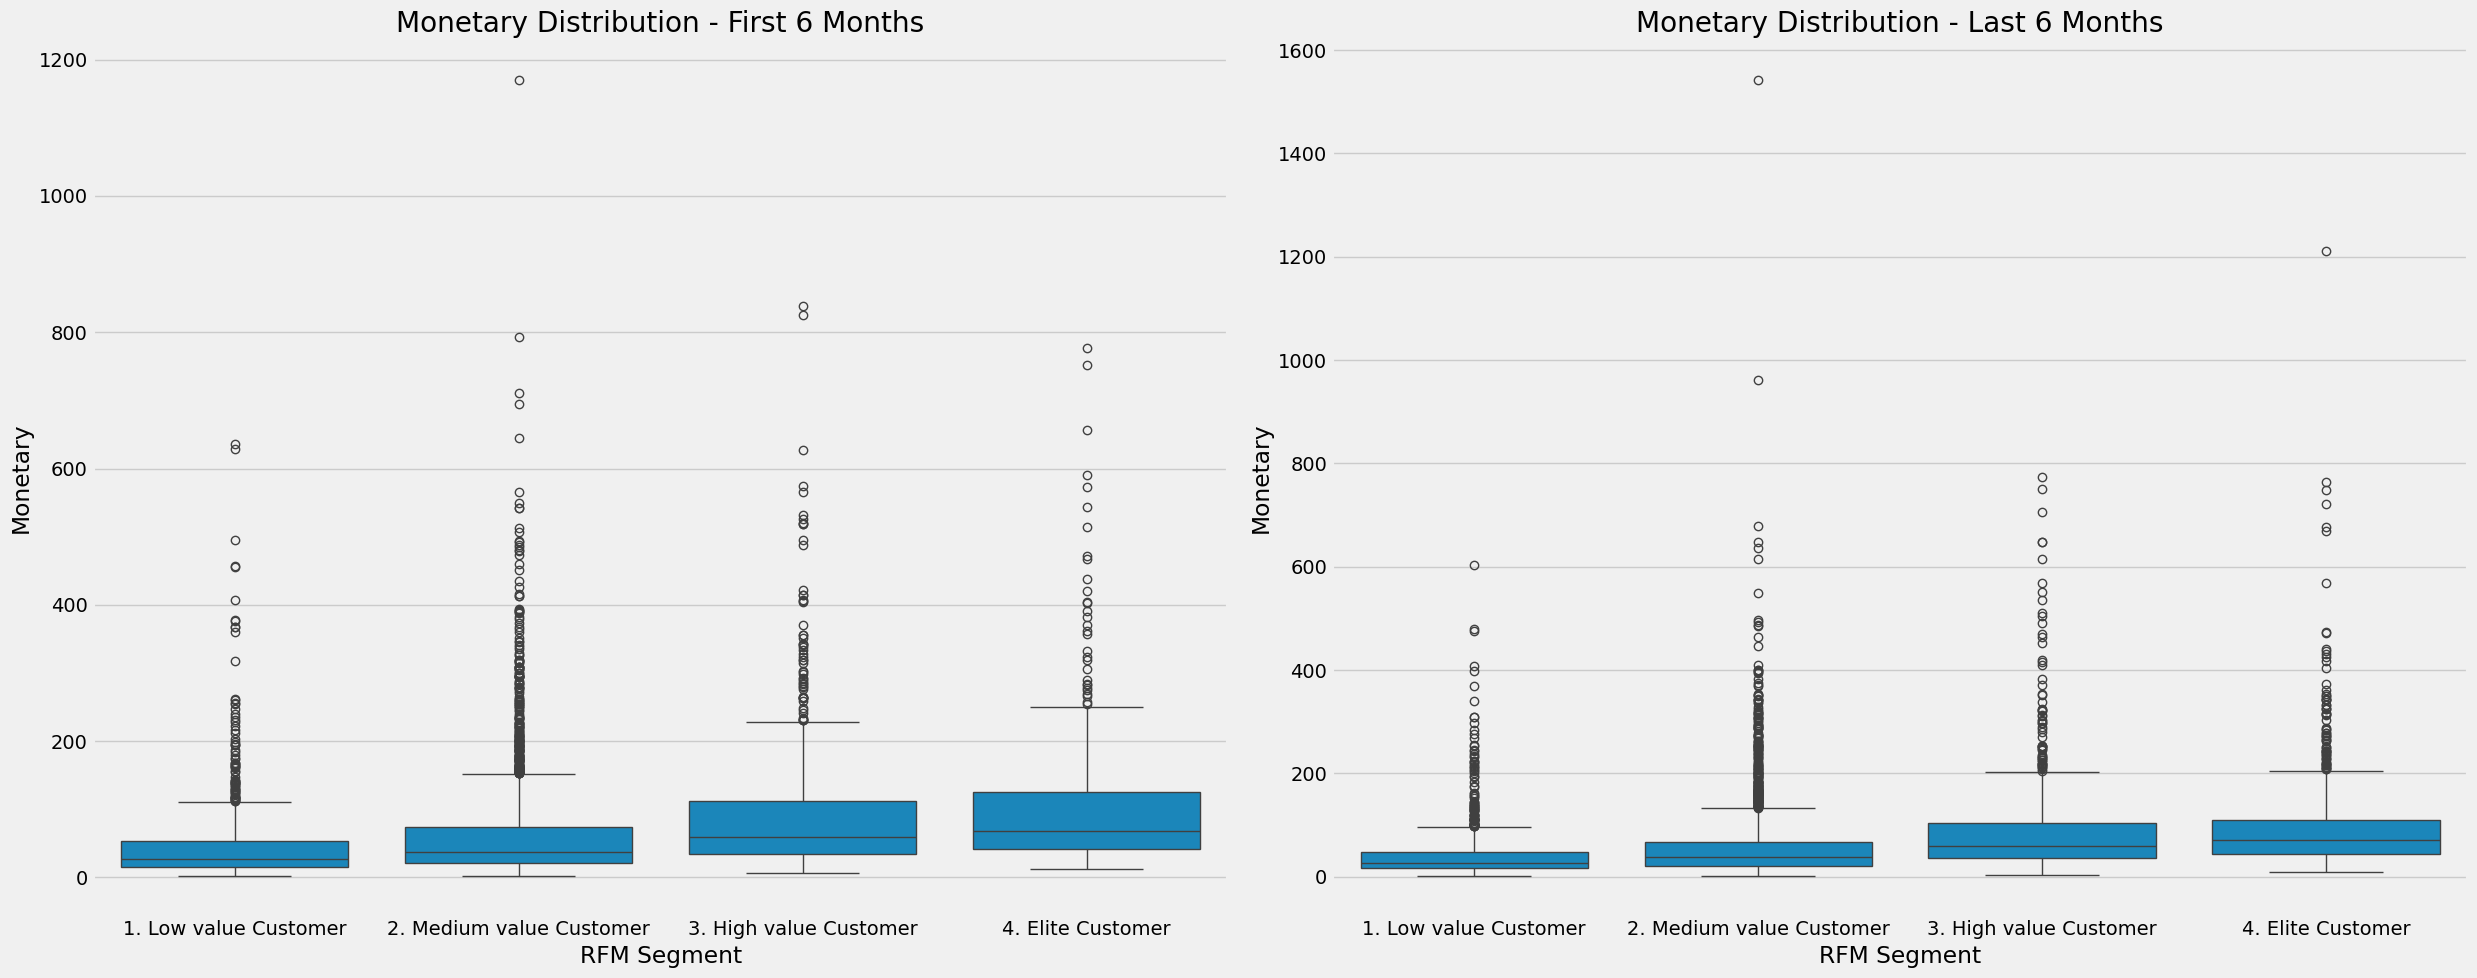

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(25, 10))

sns.boxplot(ax=axes[0], data=df_rfm_clean1, x='RFMSegment', y='Monetary', order=rfm_segment_order)
axes[0].set_title('Monetary Distribution - First 6 Months')
axes[0].set_xlabel('RFM Segment')
axes[0].set_ylabel('Monetary')

sns.boxplot(ax=axes[1], data=df_rfm_clean, x='RFMSegment', y='Monetary', order=rfm_segment_order)
axes[1].set_title('Monetary Distribution - Last 6 Months')
axes[1].set_xlabel('RFM Segment')
axes[1].set_ylabel('Monetary')

plt.tight_layout()
plt.show()

In [ ]:
!pip install squarify

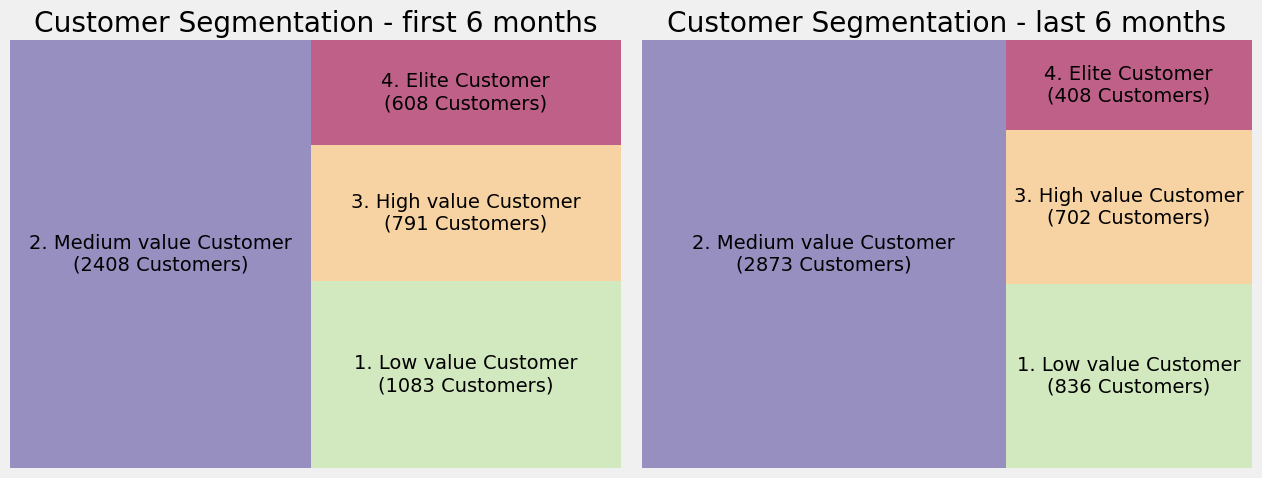

In [ ]:
#Visualisation of the two tree maps

import squarify

segment_customer_counts1 = df_rfm_clean1['RFMSegment'].value_counts()
segment_customer_counts = df_rfm_clean['RFMSegment'].value_counts()

sizes = segment_customer_counts.values
labels = [f'{segment}\n({size} Customers)' for segment, size in zip(segment_customer_counts.index, sizes)]
colors = plt.cm.Spectral_r(np.linspace(0, 1, len(labels)))

sizes1 = segment_customer_counts1.values
labels1 = [f'{segment}\n({size} Customers)' for segment, size in zip(segment_customer_counts1.index, sizes1)]
colors1 = plt.cm.Spectral_r(np.linspace(0, 1, len(labels1)))

fig, axes = plt.subplots(1, 2, figsize=(13, 5))

axes[0].set_title('Customer Segmentation - first 6 months')
squarify.plot(sizes=sizes, label=labels, color=colors, alpha=0.6, ax=axes[0])
axes[0].axis('off')

axes[1].set_title('Customer Segmentation - last 6 months')
squarify.plot(sizes=sizes1, label=labels1, color=colors1, alpha=0.6, ax=axes[1])
axes[1].axis('off')

plt.tight_layout()
plt.show()


There seems to be a decrease in the number of elite customers and high value customers and low value customers throughout the year. Conversely, there is an increase in the number of Medium-value customers. This Could suggests that some customers who were previously categorized as Elite or High-value have shifted to the Medium-value segment, acquiring a 'lower value' classification. Similarly, some customers previously categorized as Low-value may have moved up to the Medium-value segment, thus gaining a 'higher value' classification.

# 2. Churn classification

About the dataset:
This data set contains details of a bank's customers and the target variable is a binary variable reflecting the fact whether the customer left the bank (closed his account) or he continues to be a customer.

In [ ]:
df_raw_churn=pd.read_csv("/content/drive/MyDrive/AI_Marketing/Churn_Modelling.csv")
df_raw_churn

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [ ]:
df_raw_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


We don't have any null values to deal with

In [ ]:
#Checking for duplicates

df_raw_churn[df_raw_churn.duplicated(keep=False)]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited


No duplicates found

In [ ]:
df_clean_churn = df_raw_churn.copy()

#dropping unrelevant colmuns
df_clean_churn = df_clean_churn.drop(columns=['RowNumber', 'CustomerId', 'Surname'] )

#renaming the target column just for clarity
df_clean_churn = df_clean_churn.rename(columns={'Exited': 'Churn'})

df_clean_churn

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Churn
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


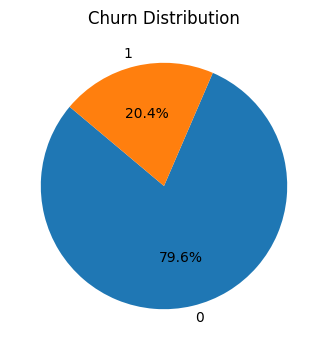

In [ ]:
#Visualising the Churn values
churn_counts = df_clean_churn['Churn'].value_counts()

plt.figure(figsize=(4, 4))
plt.pie(churn_counts, labels=churn_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Churn Distribution')
plt.show()

The classes are unbalanced, I will deal with this later on.

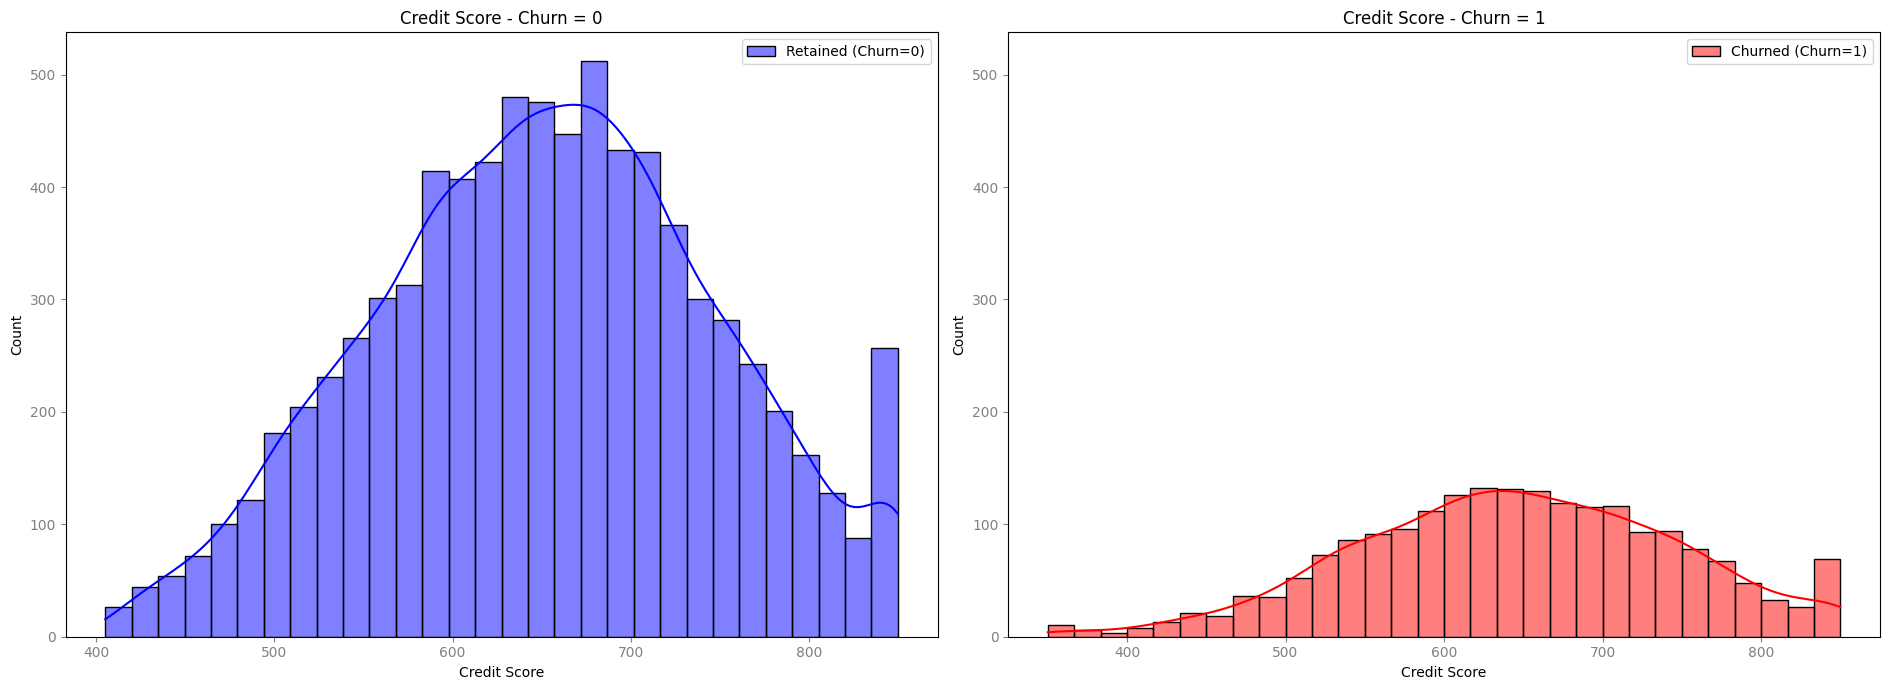

In [ ]:
#Visualisation of credit score distribution

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(19, 7))

# Plot for Churn = 0
sns.histplot(ax=axes[0], data=df_clean_churn[df_clean_churn['Churn'] == 0], x='CreditScore', bins=30, kde=True, color='blue', label='Retained (Churn=0)')
axes[0].set_title('Credit Score - Churn = 0')
axes[0].set_xlabel('Credit Score')
axes[0].set_ylabel('Count')
axes[0].tick_params(axis='x', colors='gray')
axes[0].tick_params(axis='y', colors='gray')
axes[0].legend()

# Plot for Churn = 1
sns.histplot(ax=axes[1], data=df_clean_churn[df_clean_churn['Churn'] == 1], x='CreditScore', bins=30, kde=True, color='red', label='Churned (Churn=1)')
axes[1].set_title('Credit Score - Churn = 1')
axes[1].set_xlabel('Credit Score')
axes[1].set_ylabel('Count')
axes[1].tick_params(axis='x', colors='gray')
axes[1].tick_params(axis='y', colors='gray')
axes[1].legend()

max_count = max(axes[0].get_ylim()[1], axes[1].get_ylim()[1])
axes[0].set_ylim(0, max_count)
axes[1].set_ylim(0, max_count)


plt.tight_layout()
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


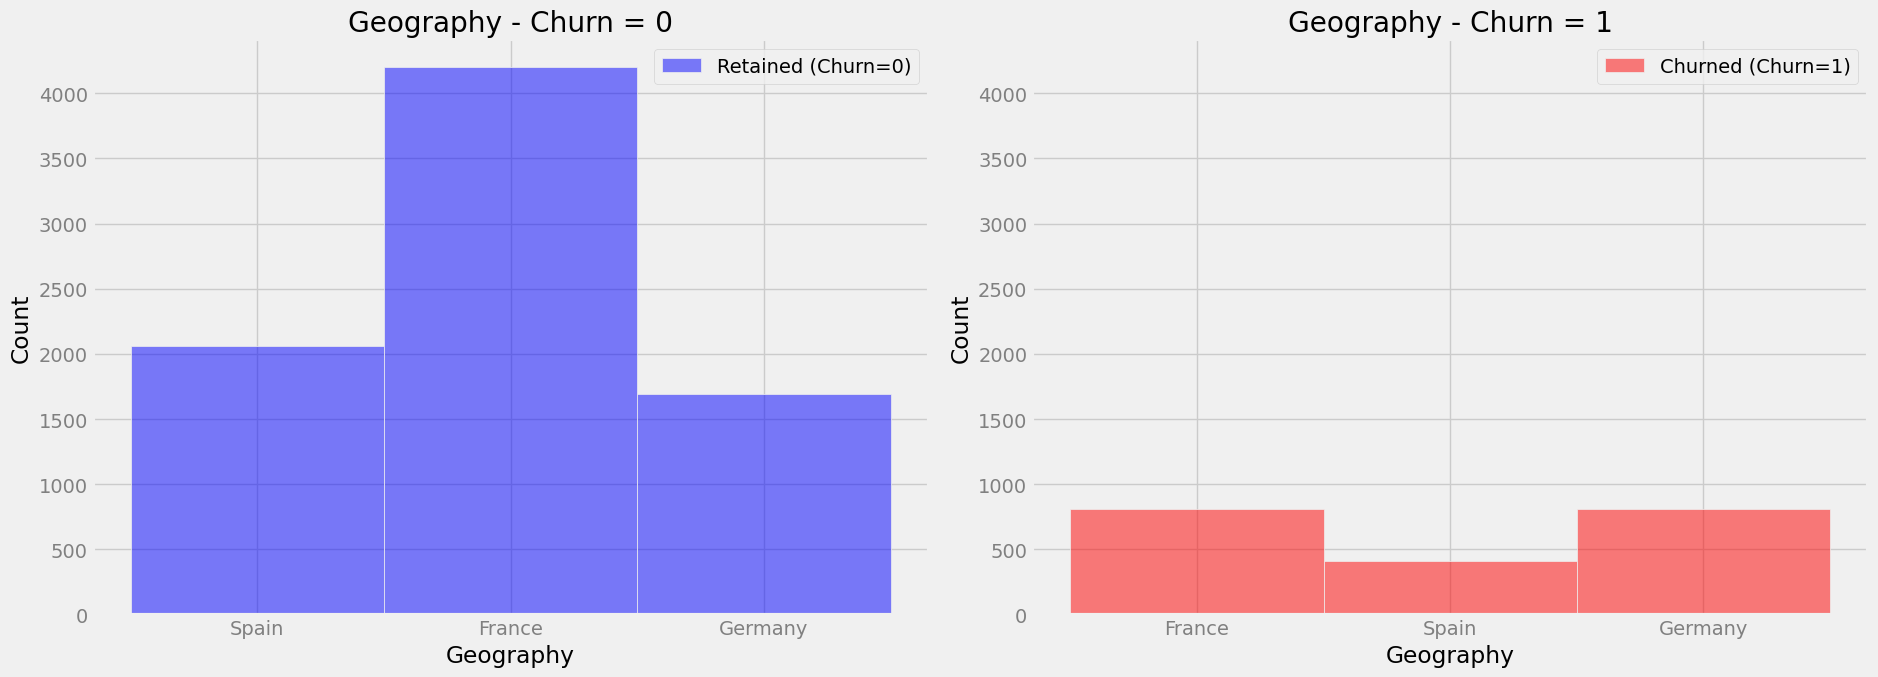

In [ ]:
#Visualisation of geography distribution

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(19, 7))

# Plot for Churn = 0
sns.histplot(ax=axes[0], data=df_clean_churn[df_clean_churn['Churn'] == 0], x='Geography', bins=30, color='blue', label='Retained (Churn=0)', alpha=0.5)
axes[0].set_title('Geography - Churn = 0')
axes[0].set_xlabel('Geography')
axes[0].set_ylabel('Count')
axes[0].tick_params(axis='x', colors='gray')
axes[0].tick_params(axis='y', colors='gray')
axes[0].legend()

# Plot for Churn = 1
sns.histplot(ax=axes[1], data=df_clean_churn[df_clean_churn['Churn'] == 1], x='Geography', bins=30, color='red', label='Churned (Churn=1)', alpha=0.5)
axes[1].set_title('Geography - Churn = 1')
axes[1].set_xlabel('Geography')
axes[1].set_ylabel('Count')
axes[1].tick_params(axis='x', colors='gray')
axes[1].tick_params(axis='y', colors='gray')
axes[1].legend()

max_count = max(axes[0].get_ylim()[1], axes[1].get_ylim()[1])
axes[0].set_ylim(0, max_count)
axes[1].set_ylim(0, max_count)


plt.tight_layout()
plt.show()

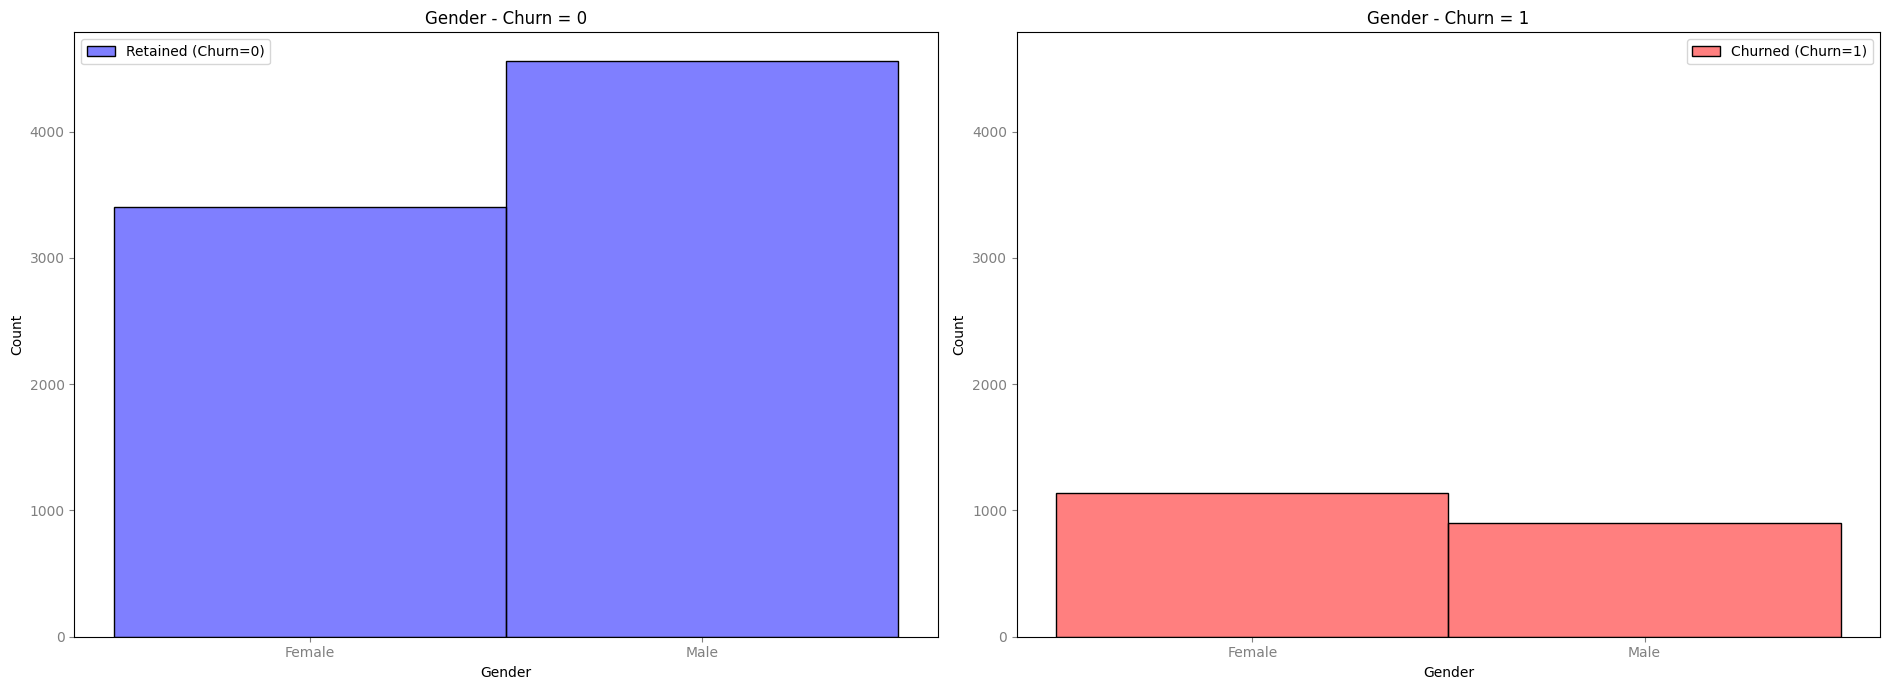

In [ ]:
#Visualisation of gender distribution

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(19, 7))

# Plot for Churn = 0
sns.histplot(ax=axes[0], data=df_clean_churn[df_clean_churn['Churn'] == 0], x='Gender', bins=30, color='blue', label='Retained (Churn=0)', alpha=0.5)
axes[0].set_title('Gender - Churn = 0')
axes[0].set_xlabel('Gender')
axes[0].set_ylabel('Count')
axes[0].tick_params(axis='x', colors='gray')
axes[0].tick_params(axis='y', colors='gray')
axes[0].legend()

# Plot for Churn = 1
sns.histplot(ax=axes[1], data=df_clean_churn[df_clean_churn['Churn'] == 1], x='Gender', bins=30, color='red', label='Churned (Churn=1)', alpha=0.5)
axes[1].set_title('Gender - Churn = 1')
axes[1].set_xlabel('Gender')
axes[1].set_ylabel('Count')
axes[1].tick_params(axis='x', colors='gray')
axes[1].tick_params(axis='y', colors='gray')
axes[1].legend()

max_count = max(axes[0].get_ylim()[1], axes[1].get_ylim()[1])
axes[0].set_ylim(0, max_count)
axes[1].set_ylim(0, max_count)


plt.tight_layout()
plt.show()

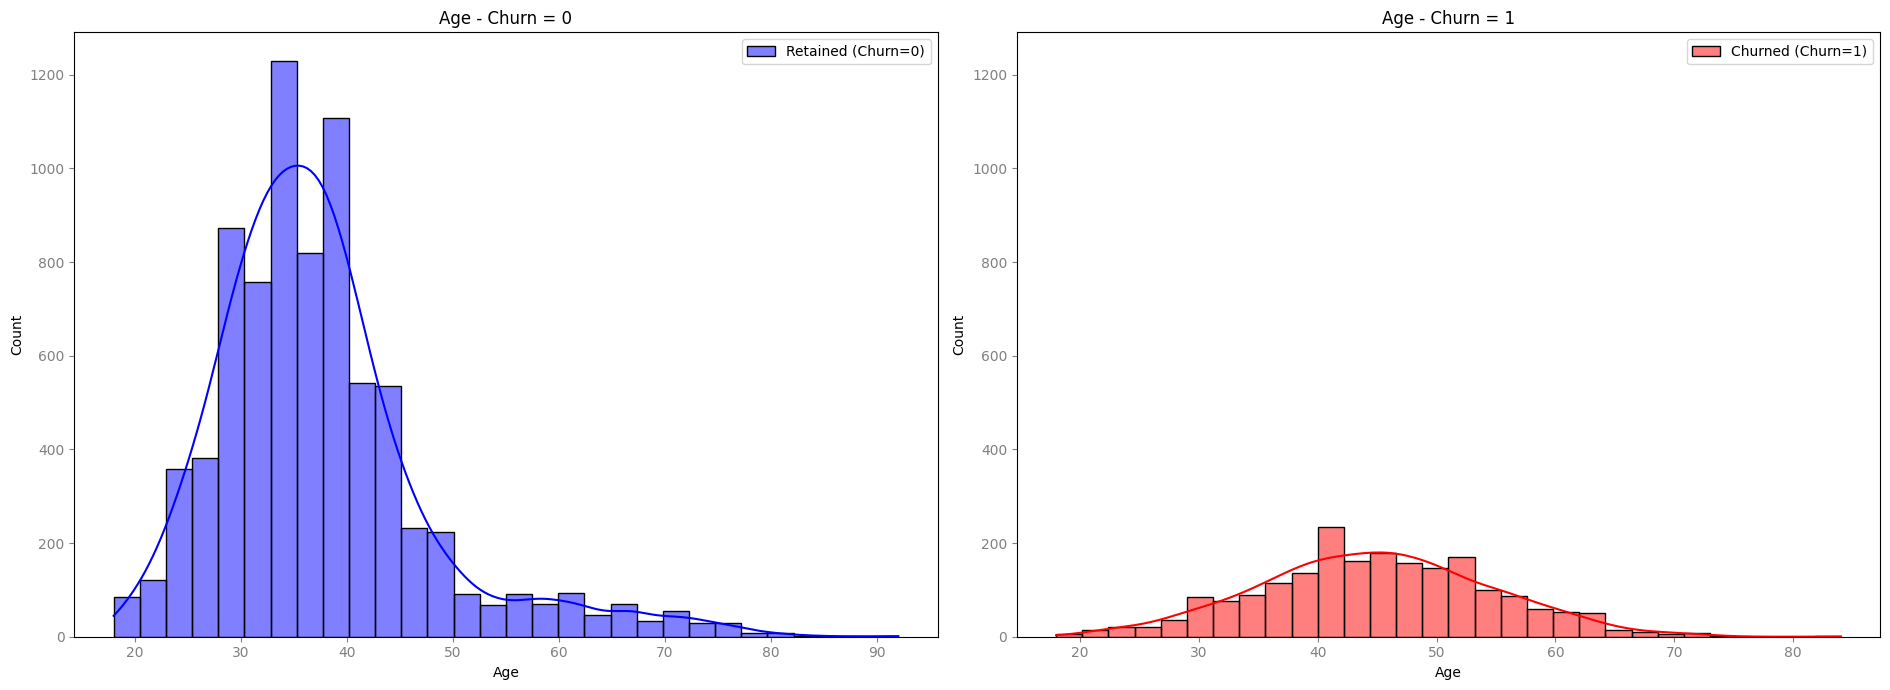

In [ ]:
#Visualisation of age distribution

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(19, 7))

# Plot for Churn = 0
sns.histplot(ax=axes[0], data=df_clean_churn[df_clean_churn['Churn'] == 0], x='Age', bins=30, kde=True, color='blue', label='Retained (Churn=0)')
axes[0].set_title('Age - Churn = 0')
axes[0].set_xlabel('Age')
axes[0].set_ylabel('Count')
axes[0].tick_params(axis='x', colors='gray')
axes[0].tick_params(axis='y', colors='gray')
axes[0].legend()

# Plot for Churn = 1
sns.histplot(ax=axes[1], data=df_clean_churn[df_clean_churn['Churn'] == 1], x='Age', bins=30, kde=True, color='red', label='Churned (Churn=1)')
axes[1].set_title('Age - Churn = 1')
axes[1].set_xlabel('Age')
axes[1].set_ylabel('Count')
axes[1].tick_params(axis='x', colors='gray')
axes[1].tick_params(axis='y', colors='gray')
axes[1].legend()

max_count = max(axes[0].get_ylim()[1], axes[1].get_ylim()[1])
axes[0].set_ylim(0, max_count)
axes[1].set_ylim(0, max_count)


plt.tight_layout()
plt.show()

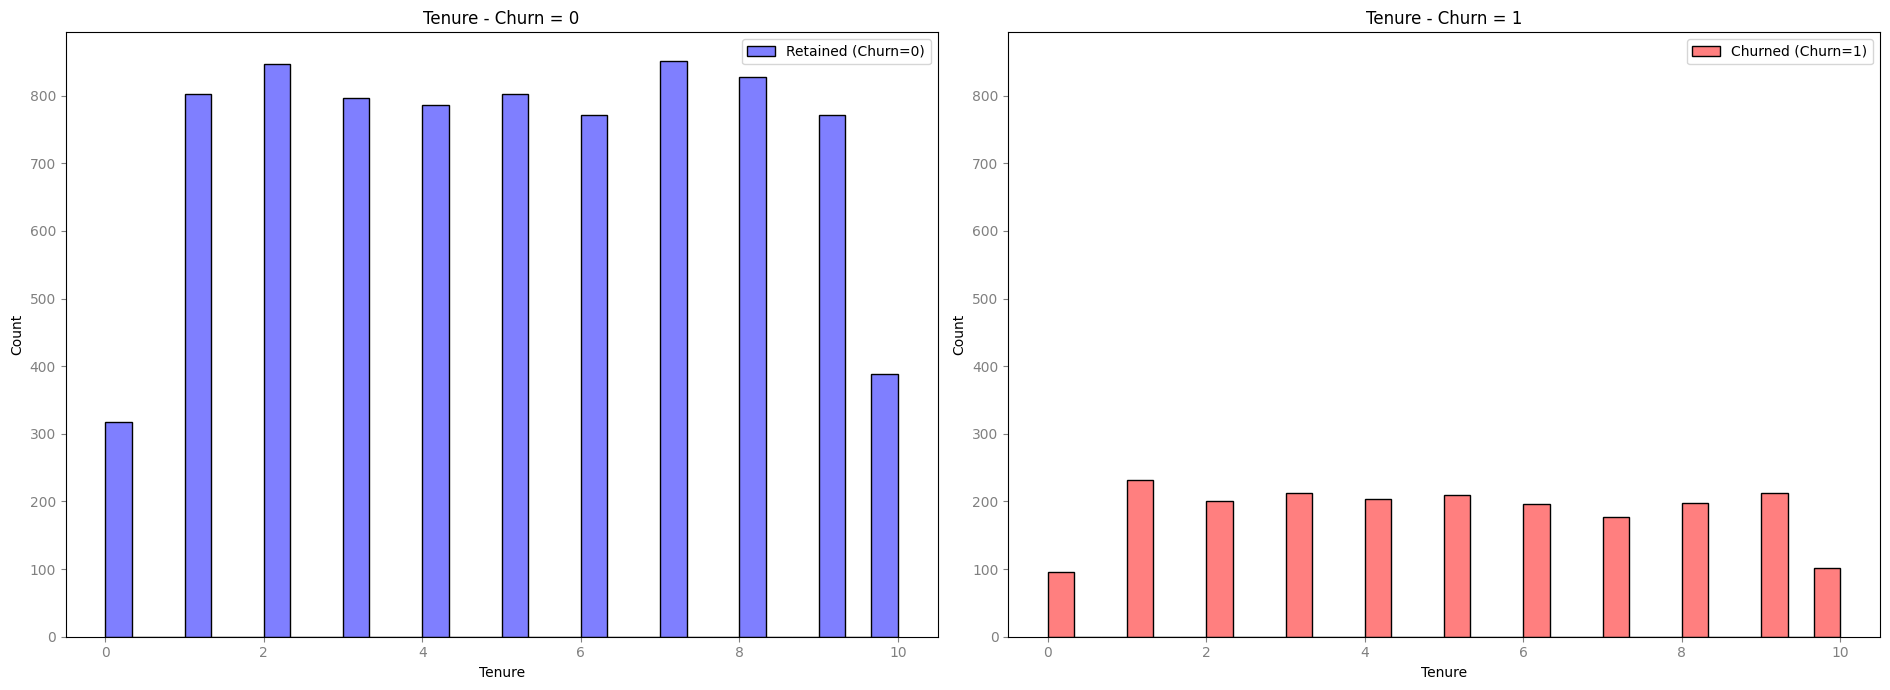

In [ ]:
#Visualisation of tenure distribution

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(19, 7))

# Plot for Churn = 0
sns.histplot(ax=axes[0], data=df_clean_churn[df_clean_churn['Churn'] == 0], x='Tenure', bins=30, color='blue', label='Retained (Churn=0)', alpha=0.5)
axes[0].set_title('Tenure - Churn = 0')
axes[0].set_xlabel('Tenure')
axes[0].set_ylabel('Count')
axes[0].tick_params(axis='x', colors='gray')
axes[0].tick_params(axis='y', colors='gray')
axes[0].legend()

# Plot for Churn = 1
sns.histplot(ax=axes[1], data=df_clean_churn[df_clean_churn['Churn'] == 1], x='Tenure', bins=30, color='red', label='Churned (Churn=1)', alpha=0.5)
axes[1].set_title('Tenure - Churn = 1')
axes[1].set_xlabel('Tenure')
axes[1].set_ylabel('Count')
axes[1].tick_params(axis='x', colors='gray')
axes[1].tick_params(axis='y', colors='gray')
axes[1].legend()

max_count = max(axes[0].get_ylim()[1], axes[1].get_ylim()[1])
axes[0].set_ylim(0, max_count)
axes[1].set_ylim(0, max_count)


plt.tight_layout()
plt.show()

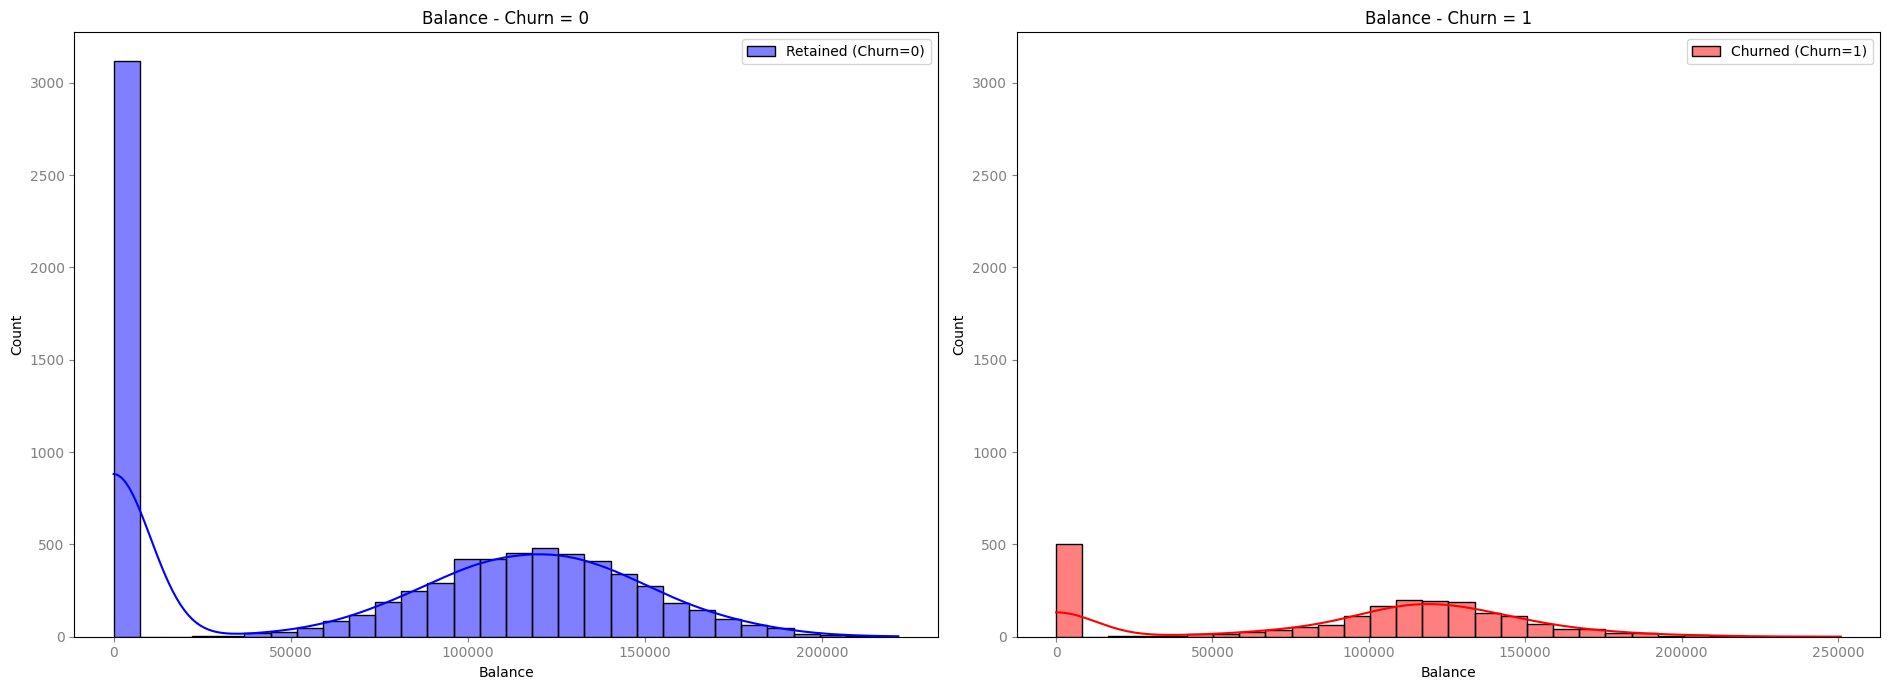

In [ ]:
#Visualisation of balance distribution

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(19, 7))

# Plot for Churn = 0
sns.histplot(ax=axes[0], data=df_clean_churn[df_clean_churn['Churn'] == 0], x='Balance', bins=30, kde=True, color='blue', label='Retained (Churn=0)')
axes[0].set_title('Balance - Churn = 0')
axes[0].set_xlabel('Balance')
axes[0].set_ylabel('Count')
axes[0].tick_params(axis='x', colors='gray')
axes[0].tick_params(axis='y', colors='gray')
axes[0].legend()

# Plot for Churn = 1
sns.histplot(ax=axes[1], data=df_clean_churn[df_clean_churn['Churn'] == 1], x='Balance', bins=30, kde=True, color='red', label='Churned (Churn=1)')
axes[1].set_title('Balance - Churn = 1')
axes[1].set_xlabel('Balance')
axes[1].set_ylabel('Count')
axes[1].tick_params(axis='x', colors='gray')
axes[1].tick_params(axis='y', colors='gray')
axes[1].legend()

max_count = max(axes[0].get_ylim()[1], axes[1].get_ylim()[1])
axes[0].set_ylim(0, max_count)
axes[1].set_ylim(0, max_count)


plt.tight_layout()
plt.show()

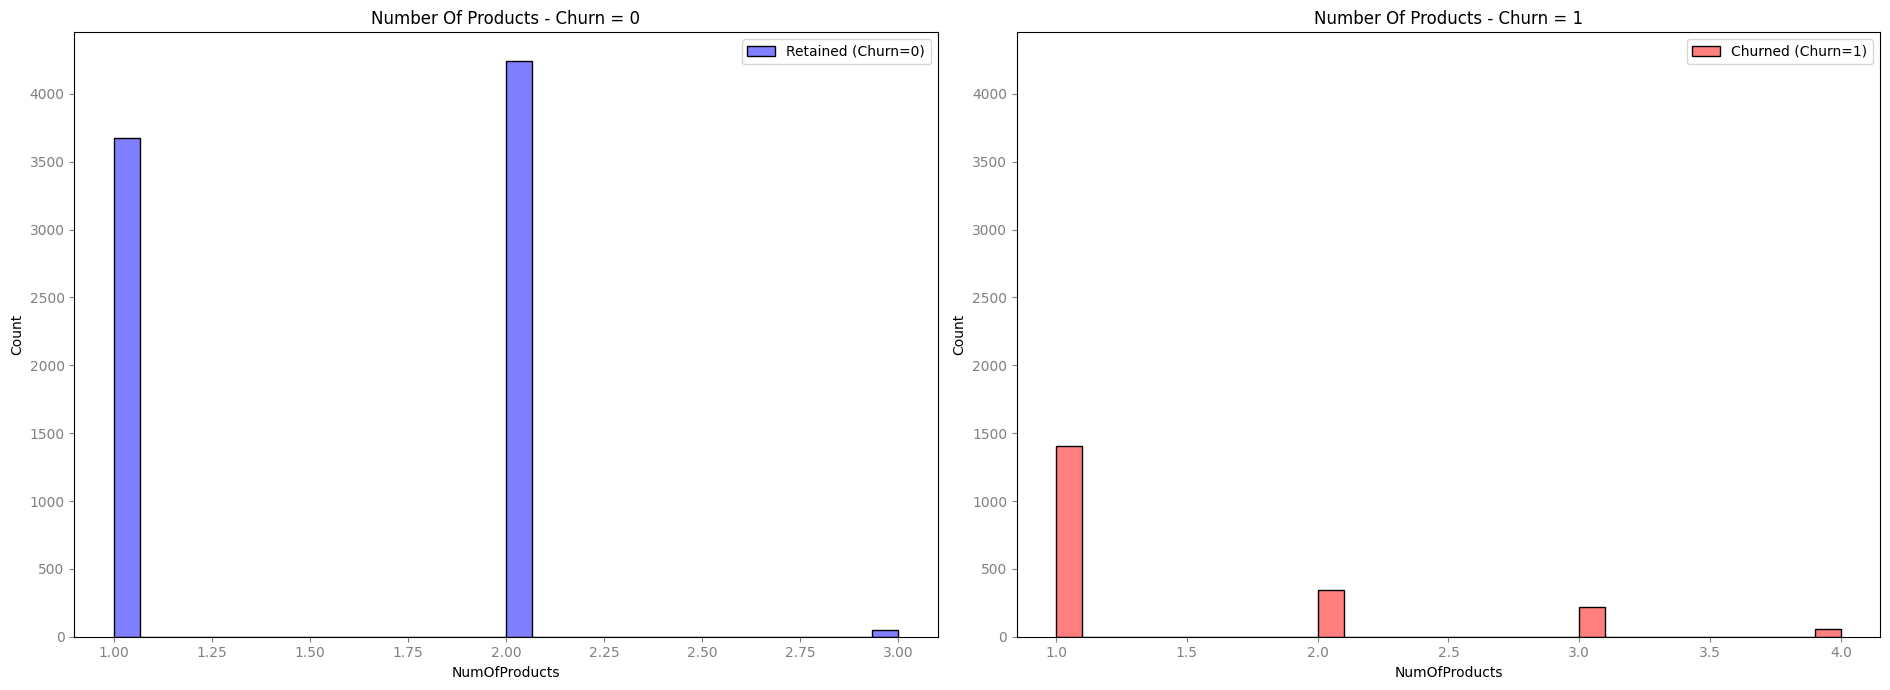

In [ ]:
#Visualisation of number of products distribution

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(19, 7))

# Plot for Churn = 0
sns.histplot(ax=axes[0], data=df_clean_churn[df_clean_churn['Churn'] == 0], x='NumOfProducts', bins=30, color='blue', label='Retained (Churn=0)', alpha=0.5)
axes[0].set_title('Number Of Products - Churn = 0')
axes[0].set_xlabel('NumOfProducts')
axes[0].set_ylabel('Count')
axes[0].tick_params(axis='x', colors='gray')
axes[0].tick_params(axis='y', colors='gray')
axes[0].legend()

# Plot for Churn = 1
sns.histplot(ax=axes[1], data=df_clean_churn[df_clean_churn['Churn'] == 1], x='NumOfProducts', bins=30, color='red', label='Churned (Churn=1)', alpha=0.5)
axes[1].set_title('Number Of Products - Churn = 1')
axes[1].set_xlabel('NumOfProducts')
axes[1].set_ylabel('Count')
axes[1].tick_params(axis='x', colors='gray')
axes[1].tick_params(axis='y', colors='gray')
axes[1].legend()

max_count = max(axes[0].get_ylim()[1], axes[1].get_ylim()[1])
axes[0].set_ylim(0, max_count)
axes[1].set_ylim(0, max_count)


plt.tight_layout()
plt.show()

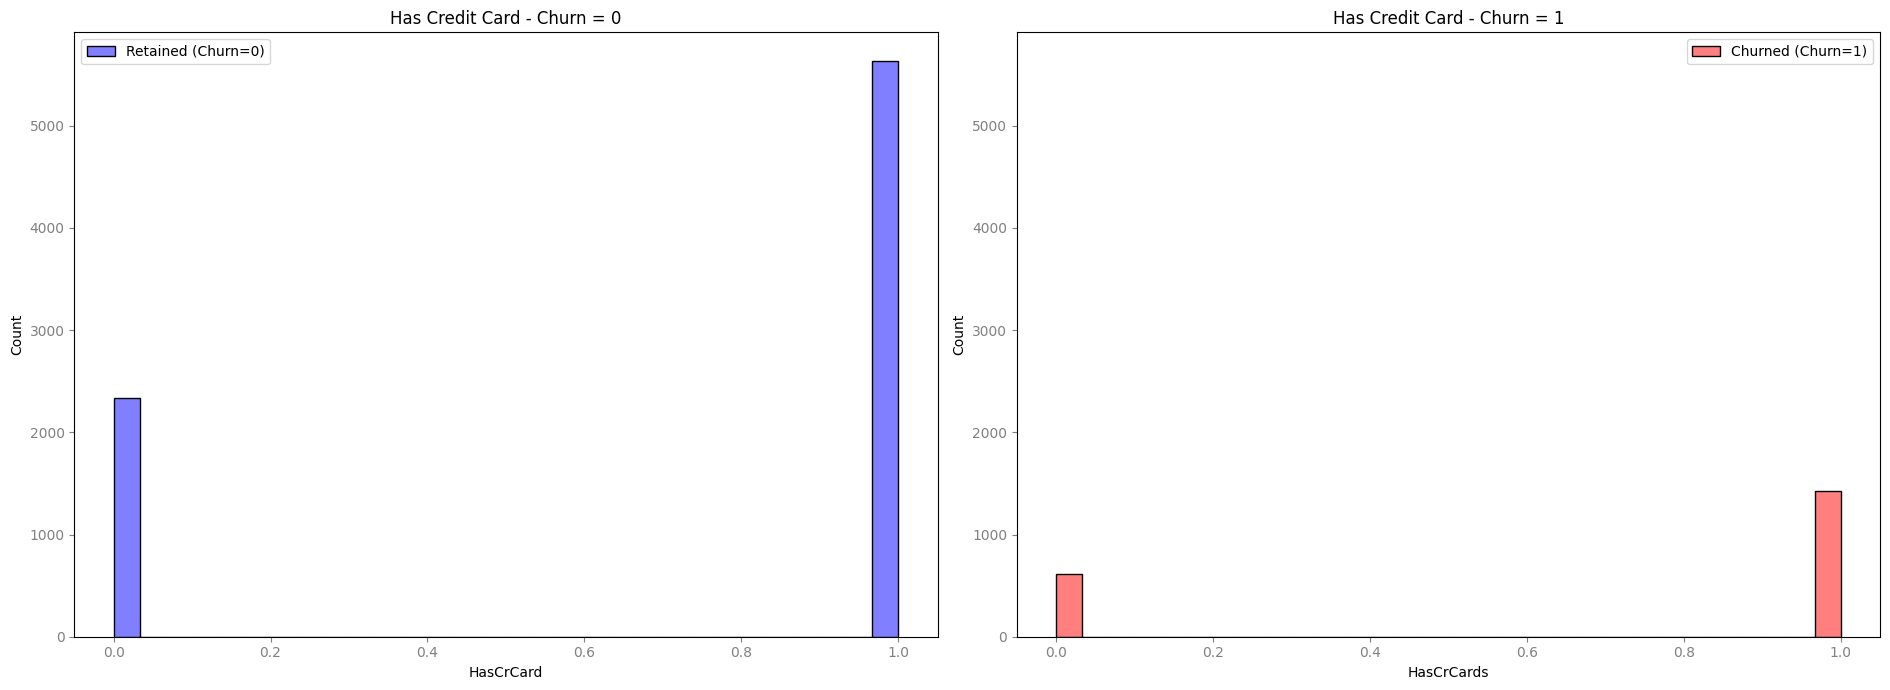

In [ ]:
#Visualisation of has credi card distribution
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(19, 7))

# Plot for Churn = 0
sns.histplot(ax=axes[0], data=df_clean_churn[df_clean_churn['Churn'] == 0], x='HasCrCard', bins=30, color='blue', label='Retained (Churn=0)', alpha=0.5)
axes[0].set_title('Has Credit Card - Churn = 0')
axes[0].set_xlabel('HasCrCard')
axes[0].set_ylabel('Count')
axes[0].tick_params(axis='x', colors='gray')
axes[0].tick_params(axis='y', colors='gray')
axes[0].legend()

# Plot for Churn = 1
sns.histplot(ax=axes[1], data=df_clean_churn[df_clean_churn['Churn'] == 1], x='HasCrCard', bins=30, color='red', label='Churned (Churn=1)', alpha=0.5)
axes[1].set_title('Has Credit Card - Churn = 1')
axes[1].set_xlabel('HasCrCards')
axes[1].set_ylabel('Count')
axes[1].tick_params(axis='x', colors='gray')
axes[1].tick_params(axis='y', colors='gray')
axes[1].legend()

# y-axis limit
max_count = max(axes[0].get_ylim()[1], axes[1].get_ylim()[1])
axes[0].set_ylim(0, max_count)
axes[1].set_ylim(0, max_count)


plt.tight_layout()
plt.show()

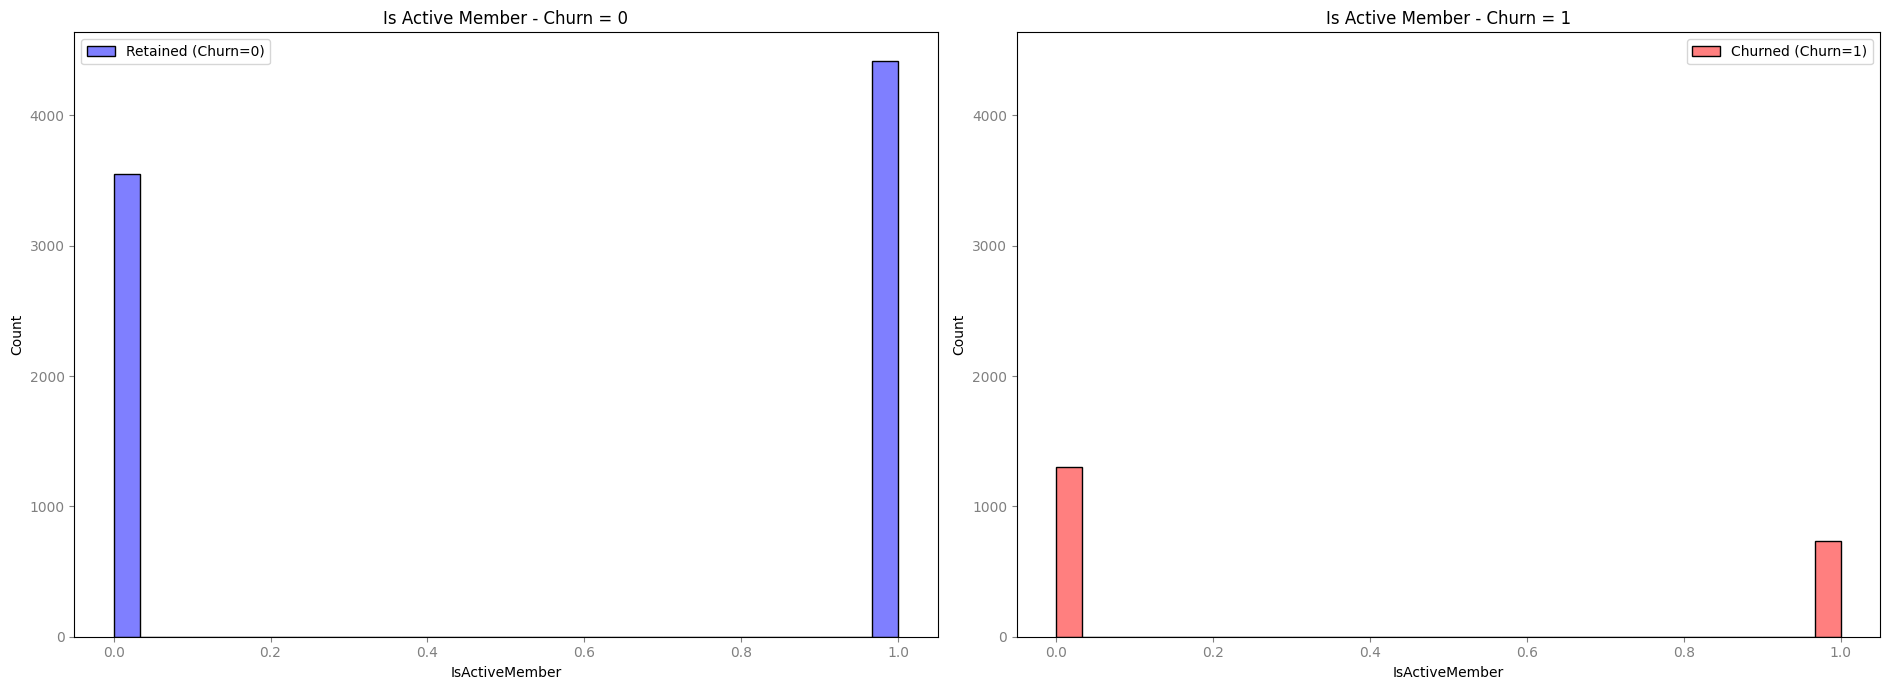

In [ ]:
#Visualisation of is active member distribution

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(19, 7))

# Plot for Churn = 0
sns.histplot(ax=axes[0], data=df_clean_churn[df_clean_churn['Churn'] == 0], x='IsActiveMember', bins=30, color='blue', label='Retained (Churn=0)', alpha=0.5)
axes[0].set_title('Is Active Member - Churn = 0')
axes[0].set_xlabel('IsActiveMember')
axes[0].set_ylabel('Count')
axes[0].tick_params(axis='x', colors='gray')
axes[0].tick_params(axis='y', colors='gray')
axes[0].legend()

# Plot for Churn = 1
sns.histplot(ax=axes[1], data=df_clean_churn[df_clean_churn['Churn'] == 1], x='IsActiveMember', bins=30, color='red', label='Churned (Churn=1)', alpha=0.5)
axes[1].set_title('Is Active Member - Churn = 1')
axes[1].set_xlabel('IsActiveMember')
axes[1].set_ylabel('Count')
axes[1].tick_params(axis='x', colors='gray')
axes[1].tick_params(axis='y', colors='gray')
axes[1].legend()

max_count = max(axes[0].get_ylim()[1], axes[1].get_ylim()[1])
axes[0].set_ylim(0, max_count)
axes[1].set_ylim(0, max_count)


plt.tight_layout()
plt.show()

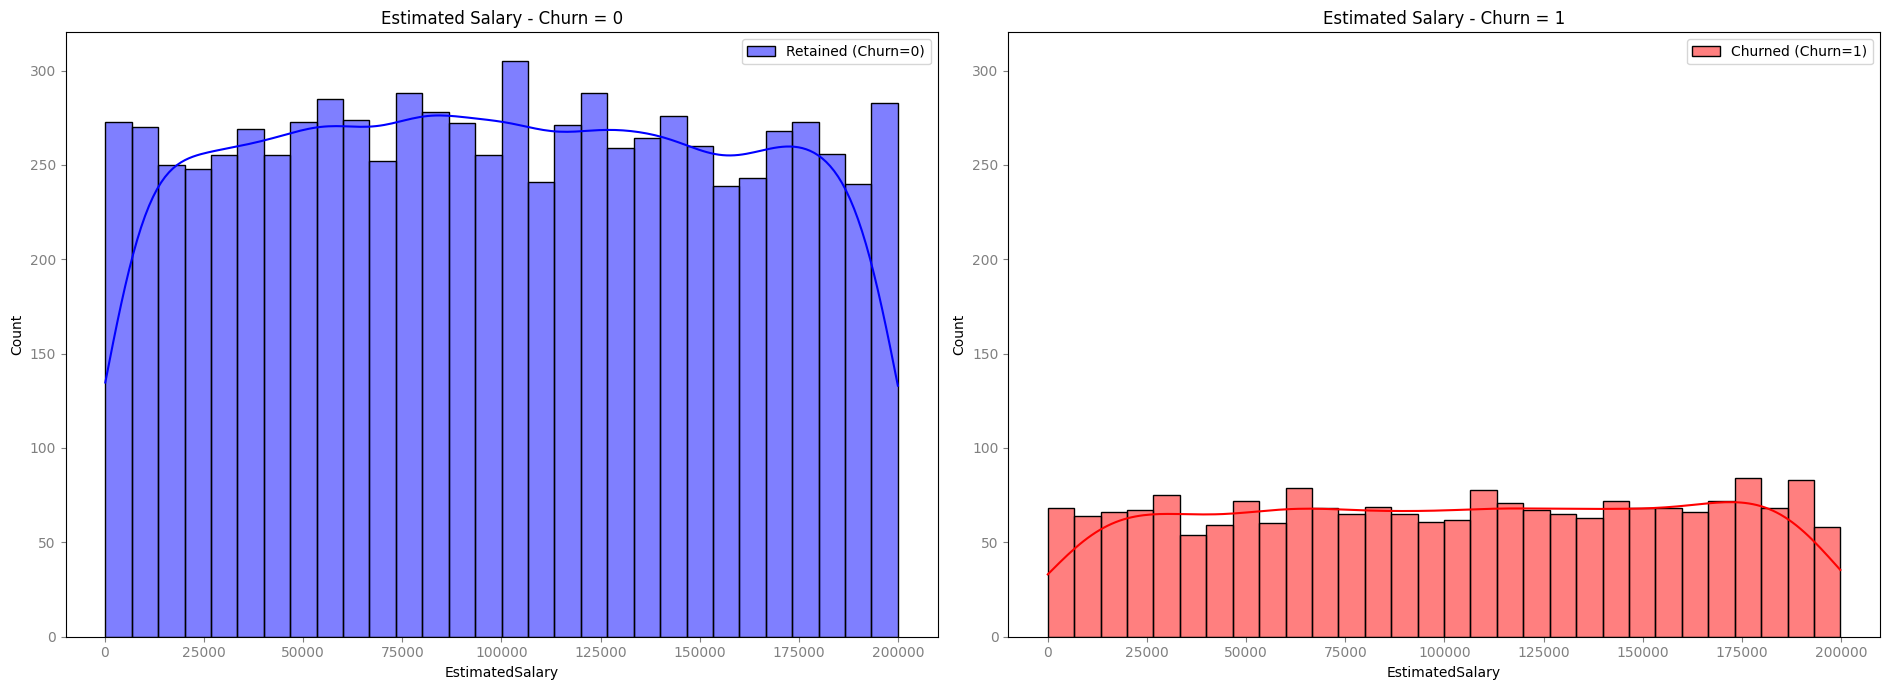

In [ ]:
#Visualisation of estimated salary distribution

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(19, 7))

# Plot for Churn = 0
sns.histplot(ax=axes[0], data=df_clean_churn[df_clean_churn['Churn'] == 0], x='EstimatedSalary', bins=30, kde=True, color='blue', label='Retained (Churn=0)')
axes[0].set_title('Estimated Salary - Churn = 0')
axes[0].set_xlabel('EstimatedSalary')
axes[0].set_ylabel('Count')
axes[0].tick_params(axis='x', colors='gray')
axes[0].tick_params(axis='y', colors='gray')
axes[0].legend()

# Plot for Churn = 1
sns.histplot(ax=axes[1], data=df_clean_churn[df_clean_churn['Churn'] == 1], x='EstimatedSalary', bins=30, kde=True, color='red', label='Churned (Churn=1)')
axes[1].set_title('Estimated Salary - Churn = 1')
axes[1].set_xlabel('EstimatedSalary')
axes[1].set_ylabel('Count')
axes[1].tick_params(axis='x', colors='gray')
axes[1].tick_params(axis='y', colors='gray')
axes[1].legend()

max_count = max(axes[0].get_ylim()[1], axes[1].get_ylim()[1])
axes[0].set_ylim(0, max_count)
axes[1].set_ylim(0, max_count)


plt.tight_layout()
plt.show()

In [ ]:
df_clean_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Churn            10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

In [ ]:
#Transforming Categorical values with one hot encoder and numerical values with standard scaler
transformation=ColumnTransformer(transformers=[
        ('ohe', OneHotEncoder(categories='auto'),['Gender', 'Geography']),
        ('std', StandardScaler(),['CreditScore','Age','Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary'] ),

    ],
    verbose_feature_names_out=False,
    remainder='passthrough',
)

transformed_data = transformation.fit_transform(df_clean_churn)
new_df = pd.DataFrame(transformed_data, columns=transformation.get_feature_names_out())
new_df

,Gender_Female,Gender_Male,Geography_France,Geography_Germany,Geography_Spain,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,HasCrCard,IsActiveMember,Churn
0,1.0,0.0,1.0,0.0,0.0,-0.326221,0.293517,-1.041760,-1.225848,-0.911583,0.021886,1.0,1.0,1.0
1,1.0,0.0,0.0,0.0,1.0,-0.440036,0.198164,-1.387538,0.117350,-0.911583,0.216534,0.0,1.0,0.0
2,1.0,0.0,1.0,0.0,0.0,-1.536794,0.293517,1.032908,1.333053,2.527057,0.240687,1.0,0.0,1.0
3,1.0,0.0,1.0,0.0,0.0,0.501521,0.007457,-1.387538,-1.225848,0.807737,-0.108918,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,1.0,2.063884,0.388871,-1.041760,0.785728,-0.911583,-0.365276,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.0,1.0,1.0,0.0,0.0,1.246488,0.007457,-0.004426,-1.225848,0.807737,-0.066419,1.0,0.0,0.0
9996,0.0,1.0,1.0,0.0,0.0,-1.391939,-0.373958,1.724464,-0.306379,-0.911583,0.027988,1.0,1.0,0.0
9997,1.0,0.0,1.0,0.0,0.0,0.604988,-0.278604,0.687130,-1.225848,-0.911583,-1.008643,0.0,1.0,1.0
9998,0.0,1.0,0.0,1.0,0.0,1.256835,0.293517,-0.695982,-0.022608,0.807737,-0.125231,1.0,0.0,1.0


In [ ]:
new_df.isnull().sum()

Gender_Female        0
Gender_Male          0
Geography_France     0
Geography_Germany    0
Geography_Spain      0
CreditScore          0
Age                  0
Tenure               0
Balance              0
NumOfProducts        0
EstimatedSalary      0
HasCrCard            0
IsActiveMember       0
Churn                0
dtype: int64

In [ ]:
#Divide in features and target
y = new_df['Churn']
X = new_df.drop(columns=['Churn'])

In [ ]:
#Perform train-test split
from sklearn.model_selection import train_test_split, learning_curve
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from imblearn.over_sampling import SMOTE, RandomOverSampler
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
models = [
    ('Logistic Regression', LogisticRegression(random_state=42)),
    ('Decision Tree', DecisionTreeClassifier(random_state=42)),
    ('Random Forest', RandomForestClassifier(random_state=42)),
    ('Gradient Boosting', GradientBoostingClassifier(random_state=42))
]

samplers = [
    ('SMOTE', SMOTE(sampling_strategy='auto', random_state=42)),
    ('RandomOverSampler', RandomOverSampler(sampling_strategy='auto', random_state=42)),
]


In [ ]:
from sklearn.metrics import f1_score, recall_score, precision_score, confusion_matrix, accuracy_score, classification_report, roc_auc_score
from imblearn.pipeline import Pipeline as IMBPipeline

results = []

for model_name, model in models:
  for sampler_name, sampler in samplers:

    pipeline = IMBPipeline([
      ('sampler', sampler),
      ('model', model)
    ])

    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    roc_auc = roc_auc_score(y_test, y_pred)

    result_info = {
      'Model': model_name,
      'Sampler': sampler_name,
      'roc-auc score': roc_auc
    }

    results.append(result_info)

sorted_results = sorted(results, key=lambda x: x['roc-auc score'])

for result_info in sorted_results:
  print(f"Model: {result_info['Model']}, Sampler: {result_info['Sampler']}, Roc auc Score: {result_info['roc-auc score']}")

Model: Decision Tree, Sampler: SMOTE, Roc auc Score: 0.6623618996500352
Model: Decision Tree, Sampler: RandomOverSampler, Roc auc Score: 0.6702457465169329
Model: Logistic Regression, Sampler: SMOTE, Roc auc Score: 0.7104762697983037
Model: Logistic Regression, Sampler: RandomOverSampler, Roc auc Score: 0.7137939171837476
Model: Random Forest, Sampler: RandomOverSampler, Roc auc Score: 0.7271717017479729
Model: Random Forest, Sampler: SMOTE, Roc auc Score: 0.7402093927517657
Model: Gradient Boosting, Sampler: SMOTE, Roc auc Score: 0.7734768666972057
Model: Gradient Boosting, Sampler: RandomOverSampler, Roc auc Score: 0.795040032328168


In [ ]:
best_model=IMBPipeline([
    ('sampler', RandomOverSampler(sampling_strategy='auto', random_state=42)),
    ('model', GradientBoostingClassifier(random_state=42))
])

In [ ]:
best_model.fit(X_train, y_train)

Pipeline(steps=[('sampler', RandomOverSampler(random_state=42)),
                ('model', GradientBoostingClassifier(random_state=42))])

In [ ]:
y_pred = best_model.predict(X_test)
print(f"accuracy:{accuracy_score(y_test, y_pred)}, recall:{recall_score(y_test, y_pred)}, roc-auc:{roc_auc_score(y_test, y_pred)}")

accuracy:0.809, recall:0.7714987714987716, roc-auc:0.795040032328168


In [ ]:
train_sizes, train_scores, test_scores = learning_curve(estimator=best_model,
                                                       X=X_train,
                                                       y=y_train,
                                                       train_sizes= [0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
                                                       cv = 10,
                                                       n_jobs = -1,
                                                       scoring = 'roc_auc',
                                                       shuffle = False)

In [ ]:
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

In [ ]:
print("Train Sizes: ", train_sizes)
print("Train Scores Mean: ", train_mean)
print("Train Scores Std: ", train_std)
print("Validation Scores Mean: ", test_mean)
print("Validation Scores Std: ", test_std)

(0.0, 1.1)

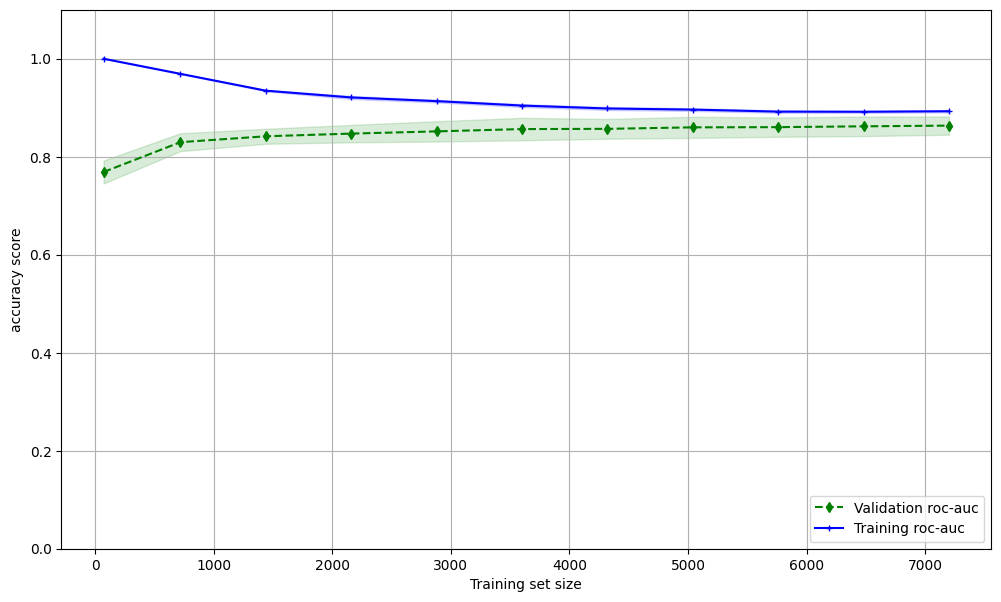

In [ ]:
fig=plt.figure(figsize=(12,7))
ax = fig.add_subplot()

ax.plot(train_sizes, test_mean,
         color='green', linestyle='--',
         marker='d', markersize=5,
         label='Validation roc-auc')

ax.fill_between(train_sizes,
                 test_mean + test_std,
                 test_mean - test_std,
                 alpha=0.15, color='green')

ax.plot(train_sizes, train_mean,
         color='blue', marker='+',
         markersize=5, label='Training roc-auc')

ax.fill_between(train_sizes,
                 train_mean + train_std,
                 train_mean - train_std,
                 alpha=0.15, color='blue')

ax.set_xlabel('Training set size')
ax.set_ylabel('accuracy score')
ax.legend(loc='lower right')

ax.grid()
ax.set_ylim([0.0, 1.10])

Let's try to perform some hyperparameter tuning

In [ ]:
from sklearn.model_selection import StratifiedKFold, RandomizedSearchCV

param_grid = {
    'sampler__sampling_strategy': ['auto', 0.5, 0.75, 1.0],
    'model__n_estimators': [50, 100, 150],
    'model__learning_rate': [0.01, 0.05, 0.1],
    'model__max_depth': [3, 4, 5],
    'model__min_samples_split': [10, 20, 30],
    'model__min_samples_leaf': [5, 10, 20],
    'model__subsample': [0.7, 0.8, 0.9],
    'model__max_features': [None, 'sqrt', 'log2']
}

rs = RandomizedSearchCV(
    best_model,
    param_grid,
    cv=StratifiedKFold(n_splits=20, shuffle=True, random_state=30),
    scoring='roc_auc',
    random_state=42,
)
rs.fit(X_train, y_train)

best_params = rs.best_params_
best_estimator = rs.best_estimator_

y_pred = best_estimator.predict(X_test)
auc_score_best = roc_auc_score(y_test, y_pred)

print(f'Best Parameters: {best_params}')
print(f'Roc auc score with Best Parameters: {auc_score_best}')

Best Parameters: {'sampler__sampling_strategy': 0.75, 'model__subsample': 0.9, 'model__n_estimators': 150, 'model__min_samples_split': 20, 'model__min_samples_leaf': 5, 'model__max_features': 'log2', 'model__max_depth': 5, 'model__learning_rate': 0.05}
Roc auc score with Best Parameters: 0.7812057049345186


In [ ]:
rs.best_estimator_.fit(X_train, y_train)

Pipeline(steps=[('sampler',
                 RandomOverSampler(random_state=42, sampling_strategy=0.75)),
                ('model',
                 GradientBoostingClassifier(learning_rate=0.05, max_depth=5,
                                            max_features='log2',
                                            min_samples_leaf=5,
                                            min_samples_split=20,
                                            n_estimators=150, random_state=42,
                                            subsample=0.9))])

In [ ]:
y_pred_2=best_estimator.predict(X_test)

In [ ]:
train_sizes, train_scores, test_scores = learning_curve(estimator=rs.best_estimator_,
                                                       X=X_train,
                                                       y=y_train,
                                                       train_sizes= [0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
                                                       cv = StratifiedKFold(n_splits=20),
                                                       n_jobs = -1,
                                                       scoring = 'roc_auc',
                                                       shuffle = False)

In [ ]:
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

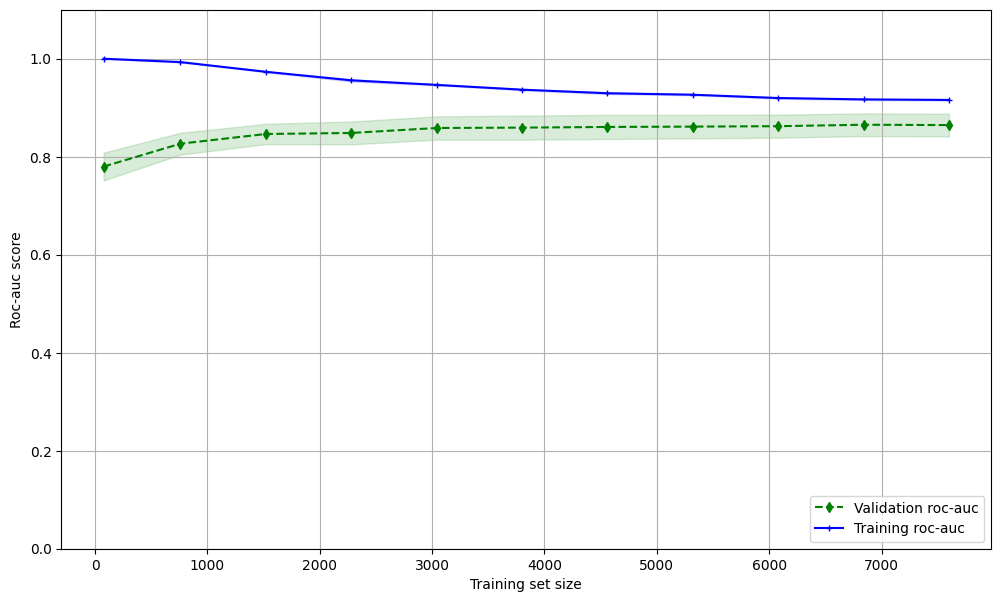

In [ ]:
fig=plt.figure(figsize=(12,7))
ax = fig.add_subplot()

ax.plot(train_sizes, test_mean,
         color='green', linestyle='--',
         marker='d', markersize=5,
         label='Validation roc-auc')

ax.fill_between(train_sizes,
                 test_mean + test_std,
                 test_mean - test_std,
                 alpha=0.15, color='green')

ax.plot(train_sizes, train_mean,
         color='blue', marker='+',
         markersize=5, label='Training roc-auc')

ax.fill_between(train_sizes,
                 train_mean + train_std,
                 train_mean - train_std,
                 alpha=0.15, color='blue')

ax.set_xlabel('Training set size')
ax.set_ylabel('Roc-auc score')
ax.legend(loc='lower right')
ax.set_ylim([0.0, 1.1])
ax.grid()


The original pipline seems to have a better generalization so I will use that one

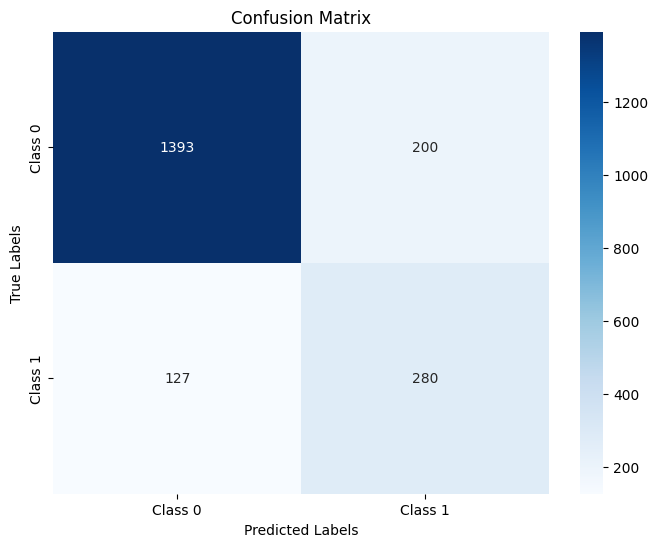

In [ ]:
cm = confusion_matrix(y_test, y_pred) #y_pred values are obtained from the best_model pipeline
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
print(f"accuracy:{accuracy_score(y_test, y_pred)}, recall:{recall_score(y_test, y_pred)}, roc-auc:{roc_auc_score(y_test, y_pred)}")

accuracy:0.8365, recall:0.687960687960688, roc-auc:0.7812057049345186


# Association rules

The dataset provided contains transactional data, with columns representing:

* TransactionNo : unique identifier for every single transaction
* Items : items purchased
* DateTime : date and time stamp of the transactions
* Daypart : part of the day when a transaction is made (morning, afternoon, evening, night)
* DayType : classifies whether a transaction has been made in weekend or weekdays

In [ ]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, fpgrowth, association_rules

In [ ]:
df_raw2=pd.read_csv("/content/drive/MyDrive/AI_Marketing/bread basket.csv")
df_raw2

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Transaction,Item,date_time,period_day,weekday_weekend
0,1,Bread,30-10-2016 09:58,morning,weekend
1,2,Scandinavian,30-10-2016 10:05,morning,weekend
2,2,Scandinavian,30-10-2016 10:05,morning,weekend
3,3,Hot chocolate,30-10-2016 10:07,morning,weekend
4,3,Jam,30-10-2016 10:07,morning,weekend
...,...,...,...,...,...
20502,9682,Coffee,09-04-2017 14:32,afternoon,weekend
20503,9682,Tea,09-04-2017 14:32,afternoon,weekend
20504,9683,Coffee,09-04-2017 14:57,afternoon,weekend
20505,9683,Pastry,09-04-2017 14:57,afternoon,weekend


In [ ]:
df_raw2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20507 entries, 0 to 20506
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Transaction      20507 non-null  int64 
 1   Item             20507 non-null  object
 2   date_time        20507 non-null  object
 3   period_day       20507 non-null  object
 4   weekday_weekend  20507 non-null  object
dtypes: int64(1), object(4)
memory usage: 801.2+ KB


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
#Checking for duplicates

df_raw2[df_raw2.duplicated(keep=False)]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Transaction,Item,date_time,period_day,weekday_weekend
1,2,Scandinavian,2016-10-30 10:05:00,morning,weekend
2,2,Scandinavian,2016-10-30 10:05:00,morning,weekend
23,11,Bread,2016-10-30 10:27:00,morning,weekend
25,11,Bread,2016-10-30 10:27:00,morning,weekend
48,21,Coffee,2016-10-30 10:49:00,morning,weekend
...,...,...,...,...,...
20423,9634,Coffee,2017-04-08 16:30:00,afternoon,weekend
20464,9664,Coffee,2017-04-09 11:40:00,morning,weekend
20465,9664,Coffee,2017-04-09 11:40:00,morning,weekend
20472,9667,Sandwich,2017-04-09 12:04:00,afternoon,weekend


In [ ]:
#dropping duplicates and changing date_time type to datetime

df_clean2=df_raw2.copy()

df_clean2=df_clean2.drop_duplicates()
df_clean2['date_time']=pd.to_datetime(df_clean2['date_time'], format='%d/%m/%Y')

df_clean2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18887 entries, 0 to 20506
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Transaction      18887 non-null  int64         
 1   Item             18887 non-null  object        
 2   date_time        18887 non-null  datetime64[ns]
 3   period_day       18887 non-null  object        
 4   weekday_weekend  18887 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 885.3+ KB


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
df_clean2.Transaction.nunique()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


9465

In [ ]:
df_agg_items = df_clean2['Item'].value_counts().reset_index()
df_agg_items.columns = ['Item', 'Frequency']
df_agg_items

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Item,Frequency
0,Coffee,4528
1,Bread,3097
2,Tea,1350
3,Cake,983
4,Pastry,815
...,...,...
89,Bacon,1
90,Gift voucher,1
91,Olum & polenta,1
92,Raw bars,1


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


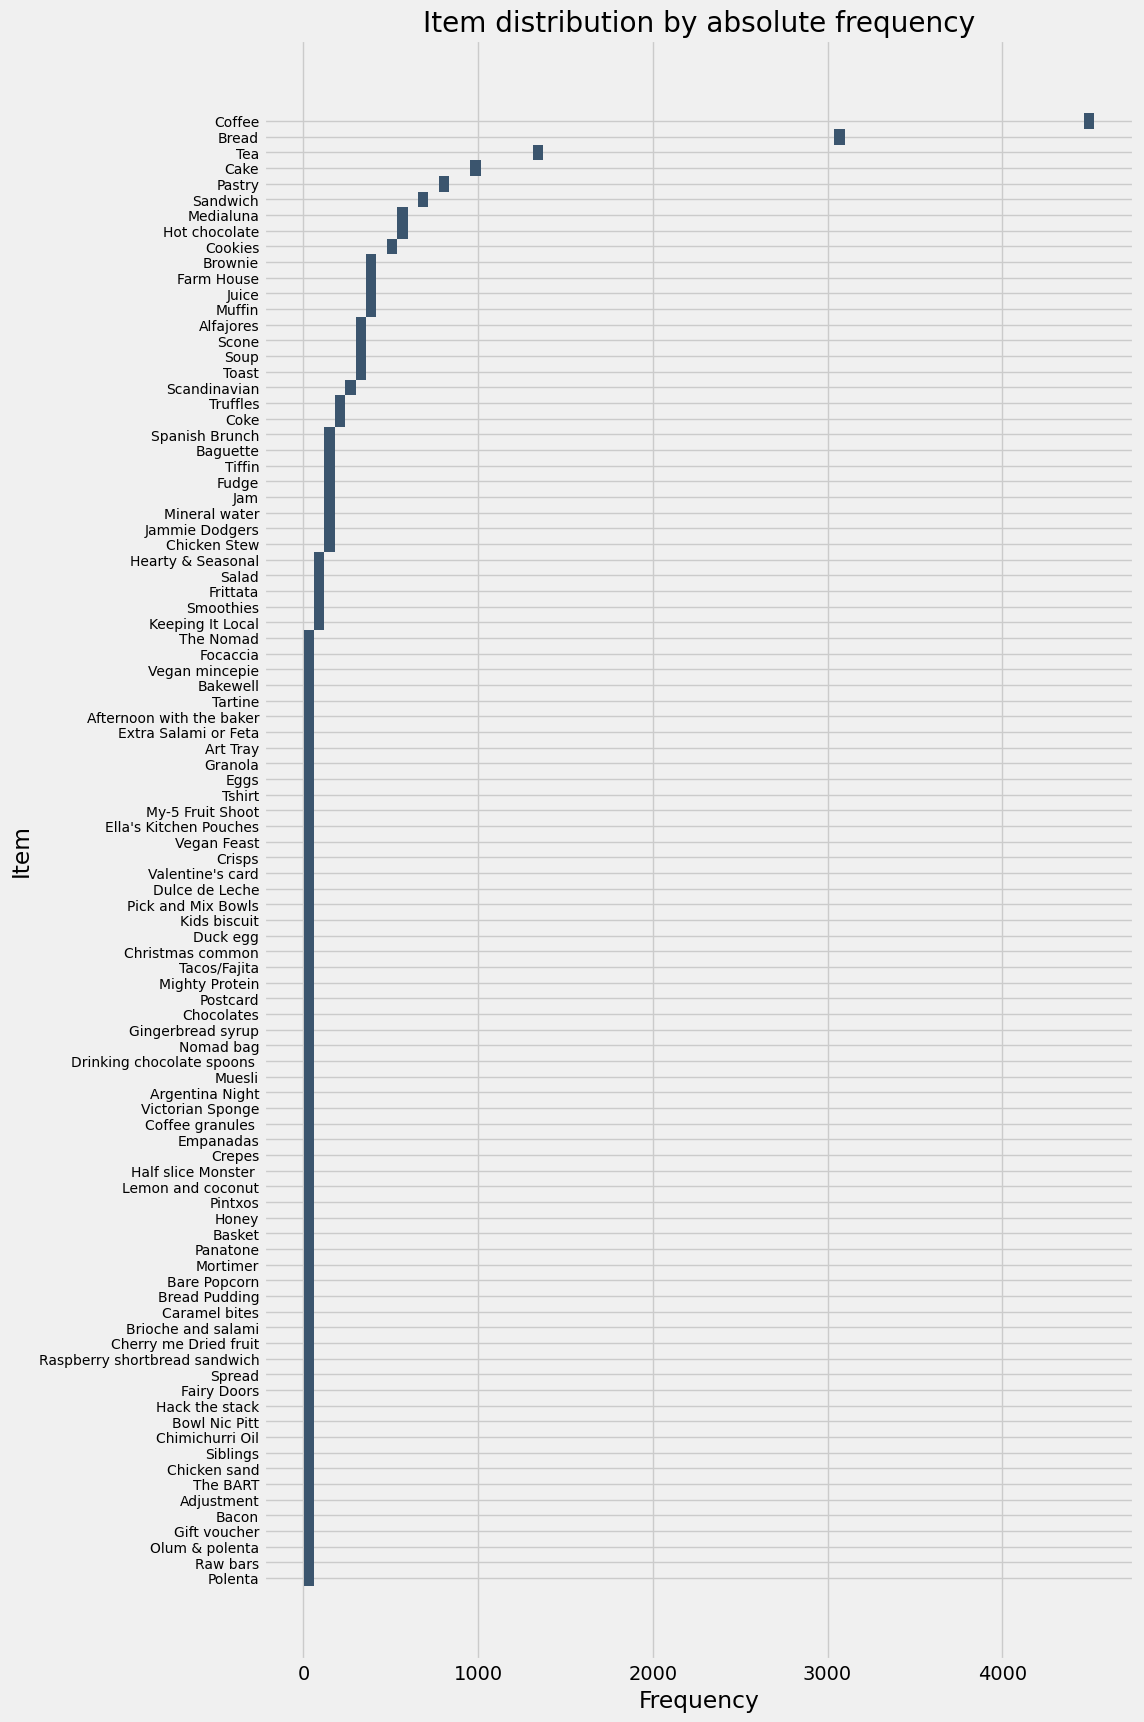

In [ ]:
plt.figure(figsize=(10, 20))
plt.style.use('fivethirtyeight')
sns.histplot(y='Item', x='Frequency', data=df_agg_items)
plt.yticks(fontsize=10)
plt.xlabel('Frequency')
plt.title('Item distribution by absolute frequency')
plt.show()

In [ ]:
df_agg_items['Relative Frequency'] = df_agg_items['Frequency'] / df_agg_items['Frequency'].sum()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


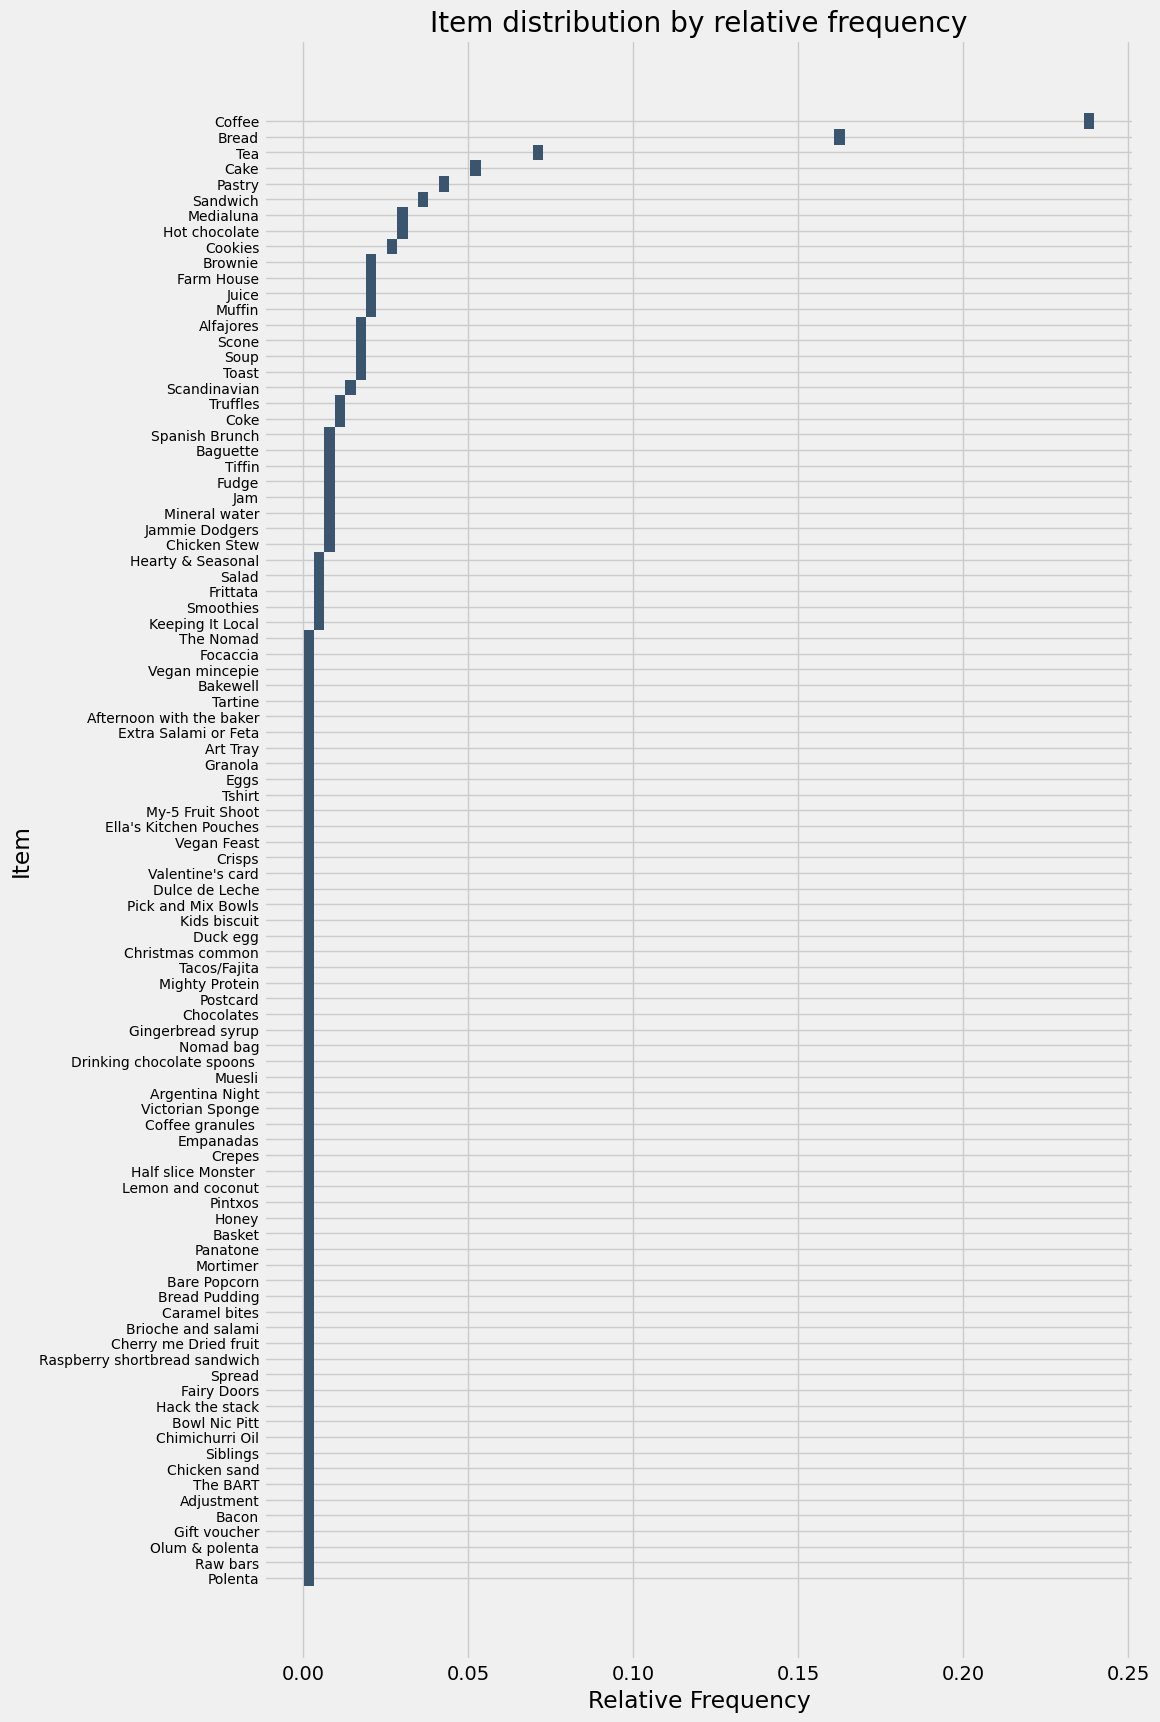

In [ ]:
plt.figure(figsize=(10, 20))
plt.style.use('fivethirtyeight')
sns.histplot(y='Item', x='Relative Frequency', data=df_agg_items)
plt.yticks(fontsize=10)
plt.xlabel('Relative Frequency')
plt.title('Item distribution by relative frequency')
plt.show()

In [ ]:
df_agg_items.head(10)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Item,Frequency,Relative Frequency
0,Coffee,4528,0.239742
1,Bread,3097,0.163975
2,Tea,1350,0.071478
3,Cake,983,0.052046
4,Pastry,815,0.043151
5,Sandwich,680,0.036004
6,Medialuna,585,0.030974
7,Hot chocolate,552,0.029226
8,Cookies,515,0.027267
9,Brownie,379,0.020067


In [ ]:
df_agg_items.tail(10)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Item,Frequency,Relative Frequency
84,Chimichurri Oil,2,0.000106
85,Siblings,2,0.000106
86,Chicken sand,1,0.000053
87,The BART,1,0.000053
88,Adjustment,1,0.000053
89,Bacon,1,0.000053
90,Gift voucher,1,0.000053
91,Olum & polenta,1,0.000053
92,Raw bars,1,0.000053
93,Polenta,1,0.000053


In [ ]:
df_agg_purchases = (
    df_raw2
    .groupby(['Transaction'])
    .agg(nu_items=('Item', 'count'))
    .reset_index()
    .sort_values(by='nu_items', ascending=False)
)
df_agg_purchases

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Transaction,nu_items
6547,6716,11
6114,6279,11
6309,6474,11
6247,6412,11
5886,6045,10
...,...,...
4374,4495,1
4373,4494,1
4371,4492,1
4370,4491,1


In [ ]:
df_agg_purchases.describe(percentiles=[.01,.05,.1,.2,.3,.4,.5,.6,.7,.8,.90,.95,.99]).T

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,count,mean,std,min,1%,5%,10%,20%,30%,40%,50%,60%,70%,80%,90%,95%,99%,max
Transaction,9465.0,4849.171157,2797.516031,1.0,96.64,481.2,967.4,1928.8,2910.2,3884.6,4867.0,5837.4,6796.8,7749.2,8713.6,9193.8,9580.36,9684.0
nu_items,9465.0,2.166614,1.301303,1.0,1.00,1.0,1.0,1.0,1.0,2.0,2.0,2.0,3.0,3.0,4.0,5.0,6.00,11.0


In [ ]:
df_agg_purchases.tail()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Transaction,nu_items
4374,4495,1
4373,4494,1
4371,4492,1
4370,4491,1
9464,9684,1


In [ ]:
 df_agg_purchases.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Transaction,nu_items
6547,6716,11
6114,6279,11
6309,6474,11
6247,6412,11
5886,6045,10


In [ ]:
 df = (
    df_raw2
    .groupby(['Transaction', 'date_time'])
    ['Item']
    .apply(list)
    .reset_index()
)
df.columns = ['Transaction', 'date_time','Items']
df.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Transaction,date_time,Items
0,1,2016-10-30 09:58:00,[Bread]
1,2,2016-10-30 10:05:00,[Scandinavian]
2,3,2016-10-30 10:07:00,"[Hot chocolate, Jam, Cookies]"
3,4,2016-10-30 10:08:00,[Muffin]
4,5,2016-10-30 10:13:00,"[Coffee, Pastry, Bread]"


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9465 entries, 0 to 9464
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Transaction  9465 non-null   int64         
 1   date_time    9465 non-null   datetime64[ns]
 2   Items        9465 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 222.0+ KB


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
transaction_encoder = TransactionEncoder()
model = transaction_encoder.fit_transform(df['Items'])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
df_transactions = pd.DataFrame(model, columns=transaction_encoder.columns_)
df_transactions.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Adjustment,Afternoon with the baker,Alfajores,Argentina Night,Art Tray,Bacon,Baguette,Bakewell,Bare Popcorn,Basket,...,The BART,The Nomad,Tiffin,Toast,Truffles,Tshirt,Valentine's card,Vegan Feast,Vegan mincepie,Victorian Sponge
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
df_apriori_frequent_pattern = apriori(df_transactions, min_support=0.01, max_len=3, use_colnames=True)
df_apriori_frequent_pattern['itemset_length'] = df_apriori_frequent_pattern['itemsets'].apply(lambda x: len(x))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
df_apriori_frequent_pattern.loc[df_apriori_frequent_pattern.itemset_length > 1].sort_values('support', ascending=False)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,support,itemsets,itemset_length
34,0.090016,"(Bread, Coffee)",2
42,0.054728,"(Cake, Coffee)",2
55,0.049868,"(Coffee, Tea)",2
50,0.047544,"(Coffee, Pastry)",2
51,0.038246,"(Coffee, Sandwich)",2
48,0.035182,"(Medialuna, Coffee)",2
46,0.029583,"(Hot chocolate, Coffee)",2
38,0.029160,"(Bread, Pastry)",2
45,0.028209,"(Cookies, Coffee)",2
40,0.028104,"(Bread, Tea)",2


In [ ]:
association_rules_metric = "lift"
association_rules_min_threshold = 1

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
df_rules_apriori = association_rules(df_apriori_frequent_pattern, metric=association_rules_metric, min_threshold=association_rules_min_threshold)
df_rules_apriori.head(10)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Coffee),(Alfajores),0.478394,0.036344,0.019651,0.041078,1.130235,0.002264,1.004936,0.220910
1,(Alfajores),(Coffee),0.036344,0.478394,0.019651,0.540698,1.130235,0.002264,1.135648,0.119574
2,(Bread),(Pastry),0.327205,0.086107,0.029160,0.089119,1.034977,0.000985,1.003306,0.050231
3,(Pastry),(Bread),0.086107,0.327205,0.029160,0.338650,1.034977,0.000985,1.017305,0.036980
4,(Brownie),(Coffee),0.040042,0.478394,0.019651,0.490765,1.025860,0.000495,1.024293,0.026259
5,(Coffee),(Brownie),0.478394,0.040042,0.019651,0.041078,1.025860,0.000495,1.001080,0.048327
6,(Cake),(Coffee),0.103856,0.478394,0.054728,0.526958,1.101515,0.005044,1.102664,0.102840
7,(Coffee),(Cake),0.478394,0.103856,0.054728,0.114399,1.101515,0.005044,1.011905,0.176684
8,(Hot chocolate),(Cake),0.058320,0.103856,0.011410,0.195652,1.883874,0.005354,1.114125,0.498236
9,(Cake),(Hot chocolate),0.103856,0.058320,0.011410,0.109868,1.883874,0.005354,1.057910,0.523553


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Text(0, 0.5, 'Confidence')

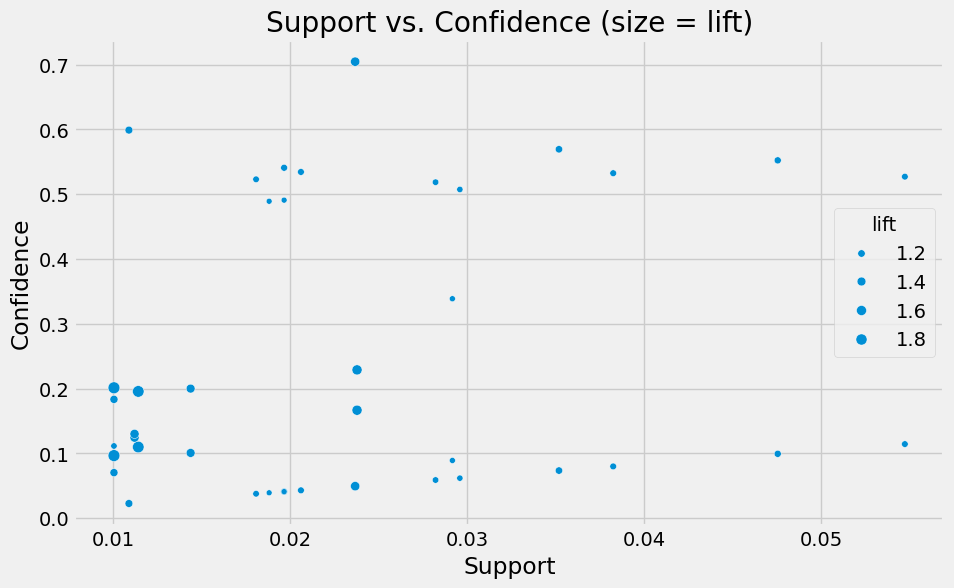

In [ ]:
#Visualisation of Support vs. Confidence (size = lift)

plt.figure(figsize=(10, 6))
sns.scatterplot(x='support', y='confidence', size='lift', data=df_rules_apriori)
plt.title('Support vs. Confidence (size = lift)')
plt.xlabel('Support')
plt.ylabel('Confidence')

In [ ]:
 df_rules_apriori.shape[0]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


42

In [ ]:
df_fpgrowth_frequent_pattern = fpgrowth(df_transactions, min_support=0.01, max_len=3, use_colnames=True)
# add a new column itemset_length
df_fpgrowth_frequent_pattern['itemset_length'] = df_fpgrowth_frequent_pattern['itemsets'].apply(lambda x: len(x))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
 df_fpgrowth_frequent_pattern.loc[df_fpgrowth_frequent_pattern.itemset_length > 1].sort_values('support', ascending=False).head(10)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,support,itemsets,itemset_length
30,0.090016,"(Bread, Coffee)",2
46,0.054728,"(Cake, Coffee)",2
42,0.049868,"(Coffee, Tea)",2
37,0.047544,"(Coffee, Pastry)",2
53,0.038246,"(Coffee, Sandwich)",2
40,0.035182,"(Medialuna, Coffee)",2
31,0.029583,"(Hot chocolate, Coffee)",2
38,0.029160,"(Bread, Pastry)",2
34,0.028209,"(Cookies, Coffee)",2
43,0.028104,"(Bread, Tea)",2


In [ ]:
df_rules_fpgrowth = association_rules(df_fpgrowth_frequent_pattern, metric='lift', min_threshold=1)
df_rules_fpgrowth.head(10)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Hot chocolate),(Coffee),0.058320,0.478394,0.029583,0.507246,1.060311,0.001683,1.058553,0.060403
1,(Coffee),(Hot chocolate),0.478394,0.058320,0.029583,0.061837,1.060311,0.001683,1.003749,0.109048
2,(Hot chocolate),(Cake),0.058320,0.103856,0.011410,0.195652,1.883874,0.005354,1.114125,0.498236
3,(Cake),(Hot chocolate),0.103856,0.058320,0.011410,0.109868,1.883874,0.005354,1.057910,0.523553
4,(Cookies),(Coffee),0.054411,0.478394,0.028209,0.518447,1.083723,0.002179,1.083174,0.081700
5,(Coffee),(Cookies),0.478394,0.054411,0.028209,0.058966,1.083723,0.002179,1.004841,0.148110
6,(Coffee),(Muffin),0.478394,0.038457,0.018806,0.039311,1.022193,0.000408,1.000888,0.041623
7,(Muffin),(Coffee),0.038457,0.478394,0.018806,0.489011,1.022193,0.000408,1.020777,0.022579
8,(Coffee),(Pastry),0.478394,0.086107,0.047544,0.099382,1.154168,0.006351,1.014740,0.256084
9,(Pastry),(Coffee),0.086107,0.478394,0.047544,0.552147,1.154168,0.006351,1.164682,0.146161


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Text(0, 0.5, 'Confidence')

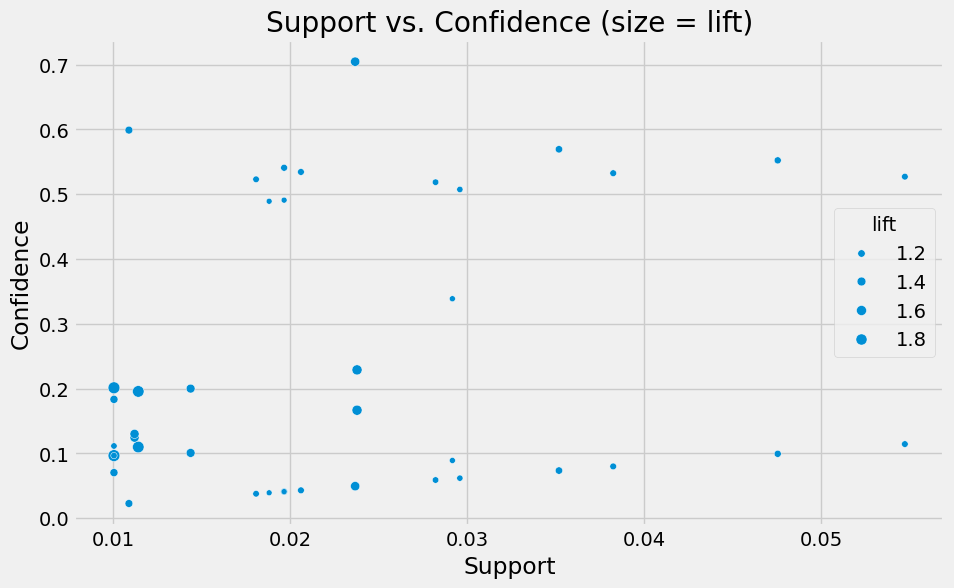

In [ ]:
#Visualisation of Support vs. Confidence (size = lift)

plt.figure(figsize=(10, 6))
sns.scatterplot(x='support', y='confidence', size='lift', data=df_rules_fpgrowth)
plt.title('Support vs. Confidence (size = lift)')
plt.xlabel('Support')
plt.ylabel('Confidence')

In [ ]:
 df_rules_fpgrowth.shape[0]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


42

In [ ]:
df_rules_apriori[df_rules_apriori["antecedents"].apply(lambda x: 'Muffin' in x)].sort_values('lift', ascending=False)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
21,(Muffin),(Coffee),0.038457,0.478394,0.018806,0.489011,1.022193,0.000408,1.020777,0.022579


In [ ]:
df_rules_fpgrowth[df_rules_fpgrowth["antecedents"].apply(lambda x: 'Muffin' in x)].sort_values('lift', ascending=False)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
7,(Muffin),(Coffee),0.038457,0.478394,0.018806,0.489011,1.022193,0.000408,1.020777,0.022579


In [ ]:
df_rules_apriori[df_rules_apriori["antecedents"].apply(lambda x: 'Coffee' in x)].sort_values('lift', ascending=False)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
39,"(Coffee, Tea)",(Cake),0.049868,0.103856,0.010037,0.201271,1.937977,0.004858,1.121962,0.509401
31,(Coffee),(Toast),0.478394,0.033597,0.023666,0.049470,1.472431,0.007593,1.016699,0.615122
36,"(Bread, Coffee)",(Pastry),0.090016,0.086107,0.011199,0.124413,1.444872,0.003448,1.043749,0.338354
38,"(Cake, Coffee)",(Tea),0.054728,0.142631,0.010037,0.183398,1.285822,0.002231,1.049923,0.235157
29,(Coffee),(Spanish Brunch),0.478394,0.018172,0.010882,0.022747,1.251766,0.002189,1.004682,0.385594
19,(Coffee),(Medialuna),0.478394,0.061807,0.035182,0.073542,1.189878,0.005614,1.012667,0.305936
22,(Coffee),(Pastry),0.478394,0.086107,0.047544,0.099382,1.154168,0.006351,1.014740,0.256084
0,(Coffee),(Alfajores),0.478394,0.036344,0.019651,0.041078,1.130235,0.002264,1.004936,0.220910
17,(Coffee),(Juice),0.478394,0.038563,0.020602,0.043065,1.116750,0.002154,1.004705,0.200428
24,(Coffee),(Sandwich),0.478394,0.071844,0.038246,0.079947,1.112792,0.003877,1.008807,0.194321


In [ ]:
df_rules_fpgrowth[df_rules_fpgrowth["antecedents"].apply(lambda x: 'Coffee' in x)].sort_values('lift', ascending=False)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
23,"(Coffee, Tea)",(Cake),0.049868,0.103856,0.010037,0.201271,1.937977,0.004858,1.121962,0.509401
37,(Coffee),(Toast),0.478394,0.033597,0.023666,0.049470,1.472431,0.007593,1.016699,0.615122
12,"(Bread, Coffee)",(Pastry),0.090016,0.086107,0.011199,0.124413,1.444872,0.003448,1.043749,0.338354
22,"(Cake, Coffee)",(Tea),0.054728,0.142631,0.010037,0.183398,1.285822,0.002231,1.049923,0.235157
41,(Coffee),(Spanish Brunch),0.478394,0.018172,0.010882,0.022747,1.251766,0.002189,1.004682,0.385594
15,(Coffee),(Medialuna),0.478394,0.061807,0.035182,0.073542,1.189878,0.005614,1.012667,0.305936
8,(Coffee),(Pastry),0.478394,0.086107,0.047544,0.099382,1.154168,0.006351,1.014740,0.256084
32,(Coffee),(Alfajores),0.478394,0.036344,0.019651,0.041078,1.130235,0.002264,1.004936,0.220910
17,(Coffee),(Juice),0.478394,0.038563,0.020602,0.043065,1.116750,0.002154,1.004705,0.200428
30,(Coffee),(Sandwich),0.478394,0.071844,0.038246,0.079947,1.112792,0.003877,1.008807,0.194321


In [ ]:
df_rules_apriori[df_rules_apriori["consequents"].apply(lambda x: 'Coffee' in x)].sort_values('lift', ascending=False)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
40,(Cake),"(Coffee, Tea)",0.103856,0.049868,0.010037,0.096643,1.937977,0.004858,1.051779,0.540090
30,(Toast),(Coffee),0.033597,0.478394,0.023666,0.704403,1.472431,0.007593,1.764582,0.332006
37,(Pastry),"(Bread, Coffee)",0.086107,0.090016,0.011199,0.130061,1.444872,0.003448,1.046033,0.336907
41,(Tea),"(Cake, Coffee)",0.142631,0.054728,0.010037,0.070370,1.285822,0.002231,1.016827,0.259266
28,(Spanish Brunch),(Coffee),0.018172,0.478394,0.010882,0.598837,1.251766,0.002189,1.300235,0.204851
18,(Medialuna),(Coffee),0.061807,0.478394,0.035182,0.569231,1.189878,0.005614,1.210871,0.170091
23,(Pastry),(Coffee),0.086107,0.478394,0.047544,0.552147,1.154168,0.006351,1.164682,0.146161
1,(Alfajores),(Coffee),0.036344,0.478394,0.019651,0.540698,1.130235,0.002264,1.135648,0.119574
16,(Juice),(Coffee),0.038563,0.478394,0.020602,0.534247,1.116750,0.002154,1.119919,0.108738
25,(Sandwich),(Coffee),0.071844,0.478394,0.038246,0.532353,1.112792,0.003877,1.115384,0.109205


In [ ]:
df_rules_fpgrowth[df_rules_fpgrowth["consequents"].apply(lambda x: 'Coffee' in x)].sort_values('lift', ascending=False)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
24,(Cake),"(Coffee, Tea)",0.103856,0.049868,0.010037,0.096643,1.937977,0.004858,1.051779,0.540090
36,(Toast),(Coffee),0.033597,0.478394,0.023666,0.704403,1.472431,0.007593,1.764582,0.332006
13,(Pastry),"(Bread, Coffee)",0.086107,0.090016,0.011199,0.130061,1.444872,0.003448,1.046033,0.336907
25,(Tea),"(Cake, Coffee)",0.142631,0.054728,0.010037,0.070370,1.285822,0.002231,1.016827,0.259266
40,(Spanish Brunch),(Coffee),0.018172,0.478394,0.010882,0.598837,1.251766,0.002189,1.300235,0.204851
14,(Medialuna),(Coffee),0.061807,0.478394,0.035182,0.569231,1.189878,0.005614,1.210871,0.170091
9,(Pastry),(Coffee),0.086107,0.478394,0.047544,0.552147,1.154168,0.006351,1.164682,0.146161
33,(Alfajores),(Coffee),0.036344,0.478394,0.019651,0.540698,1.130235,0.002264,1.135648,0.119574
16,(Juice),(Coffee),0.038563,0.478394,0.020602,0.534247,1.116750,0.002154,1.119919,0.108738
31,(Sandwich),(Coffee),0.071844,0.478394,0.038246,0.532353,1.112792,0.003877,1.115384,0.109205
